# <center> ★ Vehicle Sales Dataset Analysis ★ </center> 
## <center> ★ Promise Ibediogwu Ekele ★ </center> 
<br>
Analyzing the sales of car Vehicles

## Objectives:

* 1 Importing the Libraries
* 2 Loading of Dataset
* 3 Understanding the Dataset and Feature Description
* 4 Problem Statement
* 5 Exploratory Data Analysis
* 6 Data Cleaning
* 7 Data Analysis and Visualization
* * 8 Data Preprocessing
* * 9 Build Regression models to predict the sales w.r.t single & multiple features.
* * 10 Evaluate the models & compare their respective scores like R2, RMSE, etc*

## 1. importing libraries

In [1]:
# clearing warnings
import warnings
warnings.filterwarnings('ignore')

# the following libraries will be used fort this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column', None)

## 2. Loading the Dataset

In [2]:
df = pd.read_csv('car_prices.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## 3 Understanding the Dataset and Feature Description

## <center> ★ Promise Ibediogwu Ekele ★ </center> 
### About Dataset
#### Dataset Description:
The "Vehicle Sales and Market Trends Dataset" provides a comprehensive collection of information pertaining to the sales transactions of various vehicles. This dataset encompasses details such as the 

* year - The year that the vehicle was manufactured
* make - The make, i.e the brand or company name that manufactured the vehicle
* model - The vehicle design and structure
* trim - The trim level means the system of packaging of the particular vehicle
* body type - Different model and make has different body type
* transmission type - the transmission Type could me automatic or manual
* VIN (Vehicle Identification Number)
* state of registration - The state where the vehicle was registered
* condition rating - This condition means that the car is either in excellent state or average state, and its value is from 1 Excellent to a certain value as the case maybe
* odometer reading - This reading indicate the number of miles the vehicle has traveled.
* exterior and interior colors - it tells of the color of the car both interior and exterior
* seller information
* Manheim Market Report (MMR) values - This value is the premier indicator of whole sales prices, it can be likened as the estimated whole sale price
* selling prices
* sale dates.

<b>Key Features:</b>

* Vehicle Details: Includes specific information about each vehicle, such as its make, model, trim, and manufacturing year.

* Transaction Information: Provides insights into the sales transactions, including selling prices and sale dates.

* Market Trends: MMR values offer an estimate of the market value of each vehicle, allowing for analysis of market trends and fluctuations.

* Condition and Mileage: Contains data on the condition of the vehicles as well as their odometer readings, enabling analysis of how these factors influence selling prices.

<b>Potential Use Cases:</b>

* Market Analysis: Researchers and analysts can utilize this dataset to study trends in the automotive market, including pricing fluctuations based on factors such as vehicle condition and mileage.

* Predictive Modeling: Data scientists can employ this dataset to develop predictive models for estimating vehicle prices based on various attributes.

* Business Insights: Automotive industry professionals, dealerships, and financial institutions can derive insights into consumer preferences, market demand, and pricing strategies.

* Format: The dataset is typically presented in tabular format (e.g., CSV) with rows representing individual vehicle sales transactions and columns representing different attributes associated with each transaction.

* Data Integrity: Efforts have been made to ensure the accuracy and reliability of the data; however, users are encouraged to perform their own validation and verification processes.

* Update Frequency: The dataset may be periodically updated to include new sales transactions and market data, providing fresh insights into ongoing trends in the automotive industry.


#### The dataset is taken from Kaggle.
https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data

## <center> ★ Promise Ibediogwu Ekele ★ </center> 
## 4. Problem Statement

#### In Analyzing the Vehicle Sales, the following Questions was raised as a guide to aid the analysis:
1. The following Key Performance Indicators should be obtained: Total number of Sales, Total Sales Amount, Total MMR value, Average Sales Amount, Average MMR.
2. Top 10 Make with the hightest sales count
3. Top 10 Make with the hightest average selling price
4. Top 10 make with the highest Average MMR value
5. List 10 car make with the Least Average MMR value
6. Top 10 models with the highest sales count
7. How many Category of trim do we have in total
8. Top 10 trim that is highly purchased and which make and model are they
9. Also the trim level as related to their average mmr
10. How many transmission category do we have
11. Which is the most sold transmission
12. Whats the average mmr value for the transmission
13. which of the transmission has the highest average sale amount 
14. which of the transmission has the highest average mmr
15. The state that purchased more cars and preffered transmission
16. The state with the highest amount spent
17. How many condition category do we have in our dataset
18. Relationship between the vehicle condition and the selling price
19. which condition type is sold the most
20. Day trend on number of sales, purchase amount    
21. Months trend on number of sales, purchase amount
22. year trend on number of sales, purchase amount
23. What is the correlation between the odometer reading and the selling price
24. Top 5 best sellers with highest sales count
25. Top 5 best sellers with hughest sellingprice


## 5. Exploratory Data Analysis
#### Lets explore and understand the categorical features of the dataset

In [3]:
# viewing 10 rows in the dataset
df.head(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


In [4]:
# checking the number of row and columns we have
df.shape

(558837, 16)

* We have 558,837 rows and 16 columns in our Dataset

In [5]:
# Checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


* From the above we noticed that there are null values
* We have 4 columns which are float64 datatype, 1 int64 datatype then 11 object datatype, the saledate should be of datetime datatype, we might be having categorical data, we'll check

In [6]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

* Almost all of the columns in the dataset has null values except the year, state and the seller, we cant just remove them because they are reasonable amount of null, lets see if some or all can be treated

In [7]:
#counting the number of rows with null values
null_count = df.isnull().any(axis=1).sum()

In [8]:
null_count # total of 86512 null rows

86512

In [9]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [10]:
# checking the unique values
df.make.unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

* From the <code>make</code> column, we noticed that the letter case are not consistent, even the space between the makes (e.g) we have 'Lincoln', and 'lincoln' which are the same <code>make</code>, and others so these has to be treated. So we cant ascertain the total number of <code>make</code>, will do that after the Data cleaning process.
* Note that this column also contain <code>NaN</code>

In [11]:
df.model.unique()

array(['Sorento', '3 Series', 'S60', '6 Series Gran Coupe', 'Altima',
       'M5', 'Cruze', 'A4', 'Camaro', 'A6', 'Optima', 'Fusion', 'Sonata',
       'Q5', '6 Series', 'Impala', '5 Series', 'A3', 'XC70', 'X5', 'SQ5',
       'S5', 'Verano', 'Suburban', 'ELR', 'V60', 'X6', 'ILX', 'K900',
       'Malibu', 'RX 350', 'Versa', 'Elantra', 'Versa Note', 'A8', 'X1',
       nan, 'Enclave', 'TTS', '4 Series', 'Silverado 2500HD', 'MDX',
       'Silverado 1500', 'SRX', 'G Coupe', 'G Sedan', 'FX', 'Santa Fe',
       'Genesis', 'Equus', 'Sonata Hybrid', 'Accent', 'Veloster',
       'Elantra Coupe', 'Azera', 'Tucson', 'Genesis Coupe', 'Wrangler',
       'S-Class', 'GS 350', 'Outlander', 'C-Class', 'Mazda2', 'Rio', 'M',
       '370Z', 'Soul', 'Outlander Sport', 'SLK-Class', 'ES 350',
       'E-Class', 'Mazda3', 'Cooper Clubman', 'Cooper', 'CX-9', 'Forte',
       'Compass', 'JX', 'RX 450h', 'LR4', 'Mazda5', 'Range Rover Evoque',
       'LS 460', 'GLK-Class', 'Sportage', 'Grand Cherokee', 'MKX', 'mkt',


In [12]:
df.model.nunique()

973

* we have 973 categories including the NaN, we need to replace every whitespace within with a dash and change the case type of all the values

In [13]:
df.trim.unique()

array(['LX', '328i SULEV', 'T5', ..., 'pure', 'EWB', 'Power Wagon'],
      dtype=object)

In [14]:
df.trim.nunique()

1963

* We have 1963 trim level categories

In [15]:
df.body.unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'Navitgation', 'van', 'regular-cab',
       'g sedan', 'g coupe', 'hatchback', 'king cab', 'supercrew',
       'g convertible', 'coupe', 'crew cab', 'wagon', 'double cab',
       'e-series van', 'regular cab', 'quad cab', 'g37 convertible',
       'supercab', 'exten

* Same thing here, we also need to replace the white space inbetween with dash, then change the case type to lower, for all the value, before we can conclude on the number of <code>body</code>
* we also have <code>NaN</code> value here

In [16]:
df.transmission.unique()

array(['automatic', nan, 'manual', 'Sedan', 'sedan'], dtype=object)

* we also need to change the case type of the values of this column too 

In [17]:
df.state.unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', '3vwd17aj4fm201708', 'ns',
       '3vwd17aj2fm258506', '3vwd17aj3fm276741', '3vwd17aj2fm285365',
       '3vwd17aj0fm227318', '3vwd17aj6fm218641', '3vwd17aj7fm223475',
       '3vwd17aj5fm297123', '3vwd17aj5fm219943', '3vwd17aj9fm219766',
       '3vwd17aj3fm259017', '3vwd17aj5fm206111', '3vwd17aj5fm273601',
       '3vwd17aj5fm221322', '3vwd17aj5fm268964', '3vwd17aj6fm231972',
       '3vwd17aj7fm222388', '3vwd17aj7fm218440', '3vwd17ajxfm315938',
       '3vwd17aj7fm229552', '3vwd17aj8fm298895', '3vwd17aj4fm236636',
       '3vwd17aj5fm225953', '3vwd17aj7fm326640', '3vwd17aj8fm239622',
       '3vwd17aj2fm261566'], dtype=object)

* it seems like the state column is really messy. it comprises of the vin numbers, and it has to be clean

In [18]:
df.color.unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime', '4802', '9410', '1167', '2172', '14872', '12655', '15719',
       '6388', '16633', '11034', '2711', '6864', '339', '18384', '9887',
       '9837', '20379', '20627', '721', '6158', '2817', '5705', '18561',
       '2846', '9562', '5001'], dtype=object)

In [19]:
df.color.unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime', '4802', '9410', '1167', '2172', '14872', '12655', '15719',
       '6388', '16633', '11034', '2711', '6864', '339', '18384', '9887',
       '9837', '20379', '20627', '721', '6158', '2817', '5705', '18561',
       '2846', '9562', '5001'], dtype=object)

## 6. Data Cleaning

## Now Lets see how fa we can go in cleaning our Dataset

In [20]:
# Changing the case type and replacing the white space inbetween for the 'make' column

In [21]:
df.make = df.make.str.lower()

In [22]:
df.make.unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti',
       'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini',
       'land rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', nan, 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'landrover', 'mercedes',
       'gmc truck', 'saab', 'suzuki', 'oldsmobile', 'isuzu', 'dodge tk',
       'geo', 'rolls-royce', 'mazda tk', 'hyundai tk', 'mercedes-b', 'vw',
       'daewoo', 'chev truck', 'ford tk', 'plymouth', 'ford truck',
       'tesla', 'airstream', 'dot', 'aston martin', 'fisker',
       'lamborghini', 'lotus'], dtype=object)

In [23]:
#replacing the whitespace inbetween with '-'
df.make = df.make.str.replace(' ', '-')
df.make.unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti',
       'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini',
       'land-rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', nan, 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'landrover', 'mercedes',
       'gmc-truck', 'saab', 'suzuki', 'oldsmobile', 'isuzu', 'dodge-tk',
       'geo', 'rolls-royce', 'mazda-tk', 'hyundai-tk', 'mercedes-b', 'vw',
       'daewoo', 'chev-truck', 'ford-tk', 'plymouth', 'ford-truck',
       'tesla', 'airstream', 'dot', 'aston-martin', 'fisker',
       'lamborghini', 'lotus'], dtype=object)

In [24]:
#replacing 'mercedes-b' with mercedes-benz
df.make = df.make.str.replace('mercedes-b','mercedes-benz')
df.make.unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti',
       'jeep', 'mercedes-benzenz', 'mitsubishi', 'mazda', 'mini',
       'land-rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', nan, 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'landrover', 'mercedes',
       'gmc-truck', 'saab', 'suzuki', 'oldsmobile', 'isuzu', 'dodge-tk',
       'geo', 'rolls-royce', 'mazda-tk', 'hyundai-tk', 'mercedes-benz',
       'vw', 'daewoo', 'chev-truck', 'ford-tk', 'plymouth', 'ford-truck',
       'tesla', 'airstream', 'dot', 'aston-martin', 'fisker',
       'lamborghini', 'lotus'], dtype=object)

In [25]:
df.make = df.make.str.replace('-benzenz','-benz')
df.make.unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti',
       'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini',
       'land-rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', nan, 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'landrover', 'mercedes',
       'gmc-truck', 'saab', 'suzuki', 'oldsmobile', 'isuzu', 'dodge-tk',
       'geo', 'rolls-royce', 'mazda-tk', 'hyundai-tk', 'vw', 'daewoo',
       'chev-truck', 'ford-tk', 'plymouth', 'ford-truck', 'tesla',
       'airstream', 'dot', 'aston-martin', 'fisker', 'lamborghini',
       'lotus'], dtype=object)

In [26]:
df.make.nunique()

65

In [27]:
# also from the above we notice that the work truck is mustly replaced by tk, so we need to replace it
df.make = df.make.str.replace('tk', 'truck')
df.make.unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti',
       'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini',
       'land-rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', nan, 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'landrover', 'mercedes',
       'gmc-truck', 'saab', 'suzuki', 'oldsmobile', 'isuzu',
       'dodge-truck', 'geo', 'rolls-royce', 'mazda-truck',
       'hyundai-truck', 'vw', 'daewoo', 'chev-truck', 'ford-truck',
       'plymouth', 'tesla', 'airstream', 'dot', 'aston-martin', 'fisker',
       'lamborghini', 'lotus'], dtype=object)

In [28]:
df.make.nunique()

64

In [29]:
# lets analyse the percentage of NaN row in the make column
# if the number of NaN in make is not up to or more than 30 percent we'll have to ignore it, same we'll do for other columns
x, y = df[df.make.isna()].shape

In [30]:
df[df.make.isna()].shape #558,837

(10301, 16)

In [31]:
x

10301

In [32]:
if 0.3 * 558837 <= x:
    print('True')
else:
    print('False')
    print("============================================================================")
    print('We need to Drop and exclude the make columns that have NaN since its not up to 30 percent of our dataset')
    print("============================================================================")

False
We need to Drop and exclude the make columns that have NaN since its not up to 30 percent of our dataset


In [33]:
#now lets drop all the NaN in the make column
df2 = df.dropna(subset=['make'])

In [34]:
df2.make.unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti',
       'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini',
       'land-rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'landrover', 'mercedes',
       'gmc-truck', 'saab', 'suzuki', 'oldsmobile', 'isuzu',
       'dodge-truck', 'geo', 'rolls-royce', 'mazda-truck',
       'hyundai-truck', 'vw', 'daewoo', 'chev-truck', 'ford-truck',
       'plymouth', 'tesla', 'airstream', 'dot', 'aston-martin', 'fisker',
       'lamborghini', 'lotus'], dtype=object)

In [35]:
df2.make.nunique()

64

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548536 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          548536 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  484945 non-null  object 
 6   vin           548532 non-null  object 
 7   state         548536 non-null  object 
 8   condition     536803 non-null  float64
 9   odometer      548446 non-null  float64
 10  color         547802 non-null  object 
 11  interior      547802 non-null  object 
 12  seller        548536 non-null  object 
 13  mmr           548498 non-null  float64
 14  sellingprice  548524 non-null  float64
 15  saledate      548524 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 71.1+ MB


In [37]:
# let change the entire case type for body columns then replace whitespace with dash(-)

In [38]:
df2.body = df2.body.str.lower()
df2.body = df2.body.str.replace(' ', '-')
df2.body.unique()

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'crew-cab', 'g-coupe', 'g-sedan', 'elantra-coupe', 'genesis-coupe',
       'minivan', nan, 'van', 'double-cab', 'crewmax-cab', 'access-cab',
       'king-cab', 'supercrew', 'cts-coupe', 'extended-cab',
       'e-series-van', 'supercab', 'regular-cab', 'g-convertible', 'koup',
       'quad-cab', 'cts-v-coupe', 'g37-convertible', 'club-cab',
       'xtracab', 'q60-convertible', 'cts-wagon', 'g37-coupe', 'mega-cab',
       'cab-plus-4', 'q60-coupe', 'cab-plus', 'beetle-convertible',
       'tsx-sport-wagon', 'promaster-cargo-van',
       'granturismo-convertible', 'cts-v-wagon', 'ram-van', 'transit-van',
       'navitgation'], dtype=object)

In [39]:
df2.body.nunique()

45

* The body column has about 45 different categories

In [40]:
## Now Let's check if the entire NaN in the Dataset is below 30%

#counting the number of rows with null values
null_count = df2.isnull().any(axis=1).sum()
null_count

76211

In [41]:
if 0.3 * 558837 <=  null_count:
    print('True')
    print('Do not exclude them try and treat them')
else:
    print('False')
    print("============================================================================")
    print('We need to Drop and exclude the rows that have NaN since its not up to 30 percent of our dataset')
    print("============================================================================")

False
We need to Drop and exclude the rows that have NaN since its not up to 30 percent of our dataset


In [42]:
#so lets go ahead and drop all NaN and carry on with the Analysis, might come back to it later

df3 = df2.dropna()
df3.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [43]:
#checking the shape after removing NaN
df3.shape

(472325, 16)

In [44]:
#checking for duplicates
df3.duplicated().sum() # there is no duplicate

0

In [45]:
#df3.drop_duplicates() ---- should incase we have duplicates

In [46]:
558837 - 472325

86512

* A total number of 86,512 rows were removed from the entire dataset, which is approximately 16% of the entire dataset
* No duplicate

## Now Lets Check our Dataset

In [47]:
df3.shape

(472325, 16)

In [48]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 61.3+ MB


In [49]:
df3.make.unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'cadillac', 'acura', 'lexus', 'hyundai', 'buick', 'infiniti',
       'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini',
       'land-rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'saab', 'suzuki',
       'oldsmobile', 'rolls-royce', 'isuzu', 'plymouth', 'tesla',
       'aston-martin', 'geo', 'fisker', 'daewoo', 'lamborghini', 'lotus'],
      dtype=object)

In [50]:
df3.make.nunique()

53

In [51]:
df3.model.unique()

array(['Sorento', '3 Series', 'S60', '6 Series Gran Coupe', 'Altima',
       'M5', 'Cruze', 'A4', 'Camaro', 'A6', 'Optima', 'Fusion', 'Q5',
       '6 Series', 'Impala', '5 Series', 'A3', 'XC70', 'SQ5', 'S5',
       'Suburban', 'ELR', 'V60', 'X6', 'ILX', 'K900', 'Malibu', 'RX 350',
       'Versa', 'Elantra', 'Versa Note', 'A8', 'X1', 'Enclave', 'TTS',
       '4 Series', 'MDX', 'Silverado 1500', 'SRX', 'X5', 'G Coupe',
       'G Sedan', 'FX', 'Santa Fe', 'Genesis', 'Equus', 'Sonata',
       'Sonata Hybrid', 'Accent', 'Veloster', 'Elantra Coupe', 'Azera',
       'Tucson', 'Genesis Coupe', 'Wrangler', 'S-Class', 'GS 350',
       'Outlander', 'C-Class', 'Mazda2', 'Rio', 'M', '370Z', 'Soul',
       'Outlander Sport', 'SLK-Class', 'ES 350', 'E-Class', 'Mazda3',
       'Cooper Clubman', 'Cooper', 'CX-9', 'Forte', 'Compass', 'JX',
       'LR4', 'Mazda5', 'Range Rover Evoque', 'LS 460', 'GLK-Class',
       'Sportage', 'Grand Cherokee', 'MKX', 'XF', 'GL-Class', 'M-Class',
       'Cooper Countryma

In [52]:
df3.model.nunique()

768

In [53]:
df3.trim.unique()

array(['LX', '328i SULEV', 'T5', ..., 'pure', 'EWB', 'Power Wagon'],
      dtype=object)

In [54]:
df3.trim.nunique()

1494

In [55]:
df3.body.unique()

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'crew-cab', 'g-coupe', 'g-sedan', 'elantra-coupe', 'genesis-coupe',
       'minivan', 'van', 'double-cab', 'crewmax-cab', 'access-cab',
       'king-cab', 'cts-coupe', 'supercrew', 'e-series-van',
       'extended-cab', 'supercab', 'g-convertible', 'koup', 'regular-cab',
       'quad-cab', 'cts-v-coupe', 'g37-convertible', 'club-cab',
       'xtracab', 'q60-convertible', 'cts-wagon', 'g37-coupe', 'mega-cab',
       'cab-plus-4', 'q60-coupe', 'beetle-convertible', 'tsx-sport-wagon',
       'promaster-cargo-van', 'cab-plus', 'granturismo-convertible',
       'cts-v-wagon', 'ram-van', 'transit-van'], dtype=object)

In [56]:
df3.body.nunique()

44

In [57]:
df3.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [58]:
df3.transmission.unique()

array(['automatic', 'manual'], dtype=object)

In [59]:
df3.transmission.nunique()

2

In [60]:
df3.seller.unique()

array(['kia motors america  inc',
       'financial services remarketing (lease)',
       'volvo na rep/world omni', ..., 'maserati north america inc',
       'alternative financial group inc', 'i -5 uhlmann rv'], dtype=object)

In [61]:
df3.seller.nunique()

11923

In [62]:
# checking the descriptive statistics
df3.describe()

,year,condition,odometer,mmr,sellingprice
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,30.774177,66701.732040,13837.058964,13690.512058
std,3.822151,13.286866,51939.586894,9532.229273,9613.033738
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,28137.000000,7425.000000,7200.000000
50%,2012.000000,35.000000,51085.000000,12300.000000,12200.000000
75%,2013.000000,41.000000,96590.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [63]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 61.3+ MB


In [64]:
df3.head(1)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,kia,Sorento,LX,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


* Inference:
    1. A total of 86,512 rows were removed from the entire dataset, which is approximately 16% of the entire dataset.
    
       Most of these rows doesn't have the following features: Make, Model and other relevant features which are very important for the analysis hence the removal, but more finding can be done inorder to fill in the missing features
    2. Therefore the total number of rows and columns are: 472325 and 16 respectively
    3. After Data cleaning there was no NaN
    4. No duplicated rows
    5. The Minimum sellingprice is 1.0
    6. The Maximum sellingprice is 230,000
    7. The Minimum MMR is 25.0
    8. The Maximum MMR is 182,000
    9. We have 4 columns which are float64 datatype, 1 int64 datatype then 11 object datatype of which 9 are categorical, the saledate should be of datetime datatype
    
    

## 7. Analysis and Visualization

### Market Analysis:

* Will be performing market analysis, determining the pricing of cars based on the year, make, model, condition, millage, trim, transmission, interior and exterior color

In [65]:
#changing the datatype of the saledate
df3['SaleDate'] = pd.to_datetime(df3['saledate'], dayfirst=True)
df3.drop('saledate', axis=1, inplace=True)

In [66]:
df3.head(1)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,SaleDate
0,2015,kia,Sorento,LX,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 12:30:00+08:00


In [67]:
# the above conversion didnt work so we need to make utc=True
df3['SaleDate'] = pd.to_datetime(df3['SaleDate'], utc=True)

In [68]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   year          472325 non-null  int64              
 1   make          472325 non-null  object             
 2   model         472325 non-null  object             
 3   trim          472325 non-null  object             
 4   body          472325 non-null  object             
 5   transmission  472325 non-null  object             
 6   vin           472325 non-null  object             
 7   state         472325 non-null  object             
 8   condition     472325 non-null  float64            
 9   odometer      472325 non-null  float64            
 10  color         472325 non-null  object             
 11  interior      472325 non-null  object             
 12  seller        472325 non-null  object             
 13  mmr           472325 non-null  float64           

In [69]:
#Extracting the time, sale_weekDay_name, sale_weekDay_num, sale_month_name, sale_month_num, time in hr
df3['sale_weekDay'] = df3.SaleDate.dt.day_name()
df3['sale_weekDay_num'] = df3.SaleDate.dt.dayofweek
df3['sale_month'] = df3.SaleDate.dt.month_name()
df3['sale_month_num'] = df3.SaleDate.dt.month
df3['Year'] = df3.SaleDate.dt.year
df3['time_hr'] = df3.SaleDate.dt.time

In [70]:
#checking the dataset information
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   year              472325 non-null  int64              
 1   make              472325 non-null  object             
 2   model             472325 non-null  object             
 3   trim              472325 non-null  object             
 4   body              472325 non-null  object             
 5   transmission      472325 non-null  object             
 6   vin               472325 non-null  object             
 7   state             472325 non-null  object             
 8   condition         472325 non-null  float64            
 9   odometer          472325 non-null  float64            
 10  color             472325 non-null  object             
 11  interior          472325 non-null  object             
 12  seller            472325 non-null  object        

In [71]:
df3.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,SaleDate,sale_weekDay,sale_weekDay_num,sale_month,sale_month_num,Year,time_hr
0,2015,kia,Sorento,LX,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 04:30:00+00:00,Tuesday,1,December,12,2014,04:30:00
1,2015,kia,Sorento,LX,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 04:30:00+00:00,Tuesday,1,December,12,2014,04:30:00
2,2014,bmw,3 Series,328i SULEV,sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14 20:30:00+00:00,Wednesday,2,January,1,2015,20:30:00


### KPI's

1. Total number of sales count
2. Total Selling price
3. Total MMR value
4. Average Selling price 
5. Average MMR

#### 1. Total number of sales count

In [72]:
df3.count() # Total number of Sales count 472,325

year                472325
make                472325
model               472325
trim                472325
body                472325
transmission        472325
vin                 472325
state               472325
condition           472325
odometer            472325
color               472325
interior            472325
seller              472325
mmr                 472325
sellingprice        472325
SaleDate            472325
sale_weekDay        472325
sale_weekDay_num    472325
sale_month          472325
sale_month_num      472325
Year                472325
time_hr             472325
dtype: int64

#### 2. Total Selling price

In [73]:
total_sellp = df3.sellingprice.sum() # 6,466,371,108
total_sellp

6466371108.0

#### 3. Total MMR value


In [74]:
total_mmr = df3.mmr.sum()  # 6,535,588,875
total_mmr

6535588875.0

#### 4. Average Sellingprice

In [75]:
ave_sellp = round(df3.sellingprice.mean(), 2)  # 13,690.51
ave_sellp

13690.51

#### 5. Average MMR

In [76]:
ave_mmr = round(df3.mmr.mean(), 2)  # 13,837.06
ave_mmr

13837.06

#### Checking if there is discount in selling price from the MMR value

In [77]:
discount = total_mmr - total_sellp
discount

69217767.0

In [78]:
percentage_discount =str(round((discount * 100)/total_mmr,2)) + '% discount'
print('=========================================================================================================================')
print(f'We had approximately {percentage_discount} of the total mmr value from the total selling price which is count 69,217,767 USD')

We had approximately 1.06% discount of the total mmr value from the total selling price which is count 69,217,767 USD


### Analyzing the Categorical Features

#### 1. Analyzing the <code>Make</code> Features

* i. Top 10 <code>Make</code> with the hightest sales count ?

In [79]:
make_h = df3.make.value_counts().reset_index().head(10)
make_h

,make,count
0,ford,81013
1,chevrolet,54150
2,nissan,44043
3,toyota,35313
4,dodge,27181
5,honda,24781
6,hyundai,18659
7,bmw,17509
8,kia,15828
9,chrysler,15133


Text(0.5, 1.0, '.... Make with the Highest Sale Count ....')

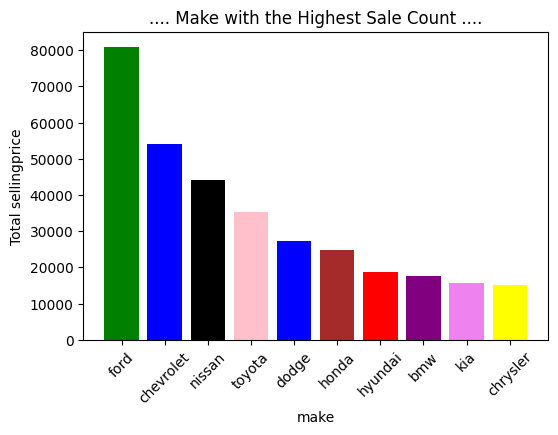

In [80]:
plt.figure(figsize=(6,4))
plt.bar(make_h['make'], make_h['count'], color=['green','blue','black','pink','blue','brown','red','purple','violet','yellow'])
plt.tick_params(axis='x', rotation=45)
plt.xlabel('make')
plt.ylabel('Total sellingprice')
plt.title('.... Make with the Highest Sale Count ....')

In [81]:
# The fold car has the highest sold count with 81,013 cars sold, this is to say that the fold car is mostly bought, this could be for different reasens

* ii. Top 10 <code>Make</code> with the hightest average selling price ?

In [82]:
make_a = round(df3.groupby('make')['sellingprice'].mean().reset_index().sort_values(by='sellingprice', ascending=False), 2).head(10)
make_a


,make,sellingprice
42,rolls-royce,153456.25
11,ferrari,128852.94
25,lamborghini,111500.00
3,bentley,72713.33
49,tesla,67054.35
1,aston-martin,55500.00
13,fisker,46461.11
30,maserati,43729.82
29,lotus,40800.00
40,porsche,38932.11


Text(0.5, 1.0, '.... Make with the Highest Average Selling Price ....')

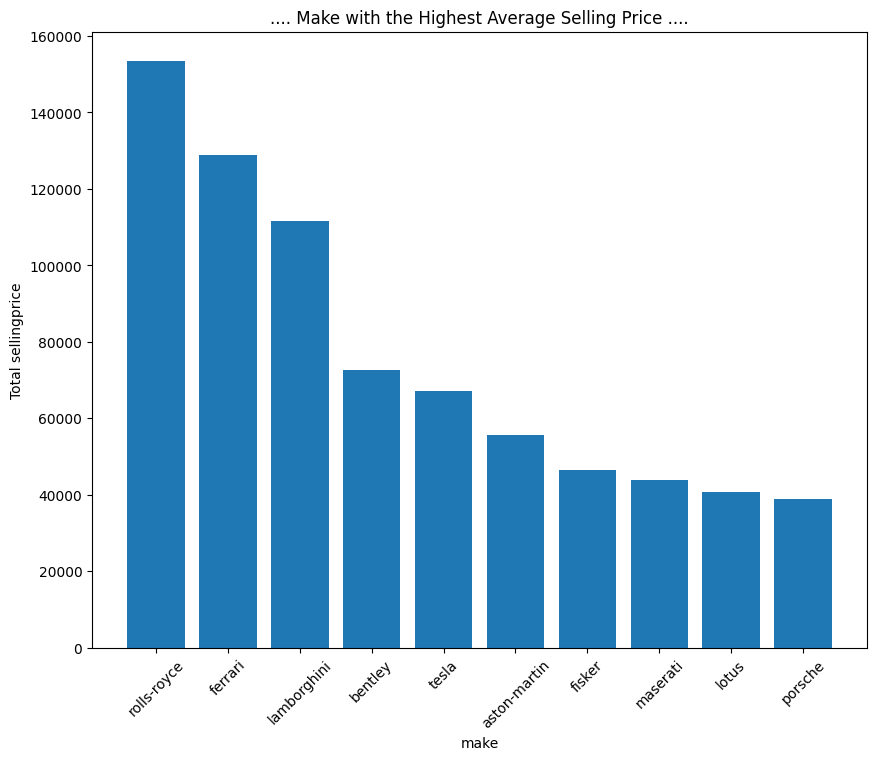

In [83]:
plt.figure(figsize=(10,8))
plt.bar(make_a['make'], make_a['sellingprice'])
plt.tick_params(axis='x', rotation=45)
plt.xlabel('make')
plt.ylabel('Total sellingprice')
plt.title('.... Make with the Highest Average Selling Price ....')

In [84]:
# The rolls-royce has the highest Average sellingprice of 153,456.25 USD, we can say that a lot of money was spent on the rolls-royce car, maybe it might be because of the cost, maybe the rolls-royce car is quite expensive with other features and capability, even though the price of a car is also based on the model of that particular make

* iii Top 10 <code>make</code> with the highest Average MMR</code> value

In [85]:
make_mmr = round(df3.groupby('make')['mmr'].mean().reset_index().sort_values(by='mmr', ascending=False),2)
make_mmr = make_mmr.head(10)
make_mmr

,make,mmr
42,rolls-royce,154812.50
11,ferrari,130823.53
25,lamborghini,113666.67
3,bentley,74077.14
49,tesla,67813.04
1,aston-martin,54075.00
13,fisker,49100.00
30,maserati,44708.72
29,lotus,40300.00
40,porsche,39143.28


Text(0.5, 1.0, '.... Make with the Highest Average Manheim Market Report ....')

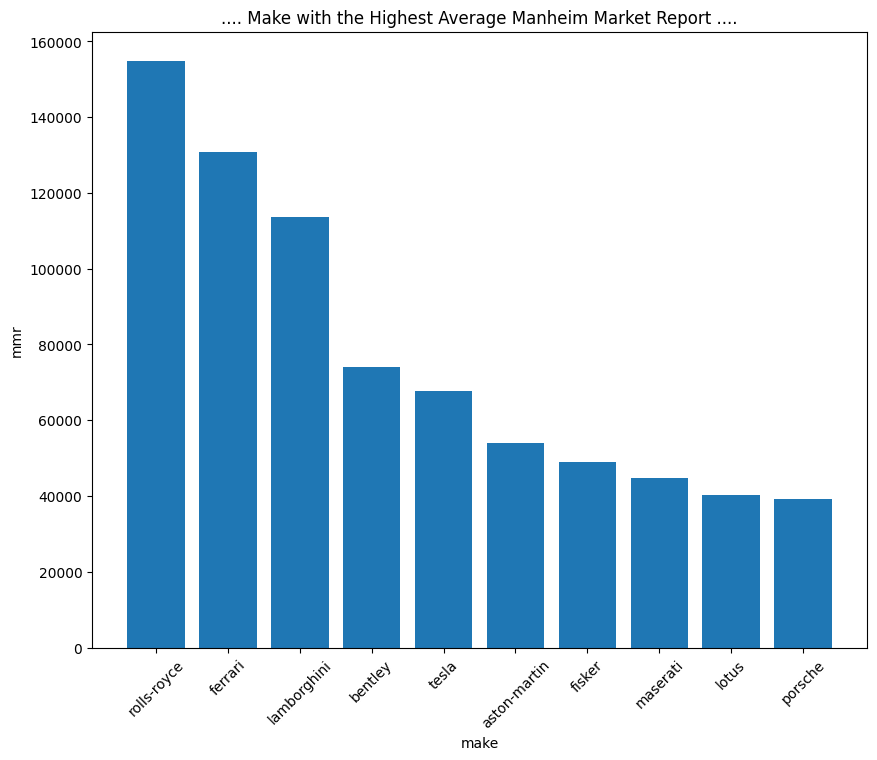

In [86]:
plt.figure(figsize=(10,8))
plt.bar(make_mmr['make'], make_mmr['mmr'])
plt.tick_params(axis='x', rotation=45)
plt.xlabel('make')
plt.ylabel('mmr')
plt.title('.... Make with the Highest Average Manheim Market Report ....')

In [87]:
# The rolls-royce car is the car with the highest mmr value of 154,812.50 USD we can also say that its the most costly car

In [88]:
# Now lets check the car with the least MMR value, we can say the car that is least expensive

* iv Least 10 car <code>make</code> with the Least Average MMR value


In [89]:
make_mmr_l = round(df3.groupby('make')['mmr'].mean().reset_index().sort_values(by='mmr', ascending=True),2)
make_mmr_l = make_mmr_l.head(10)
make_mmr_l

,make,mmr
9,daewoo,487.50
15,geo,598.44
37,oldsmobile,1106.68
21,isuzu,1808.10
44,saturn,3563.73
43,saab,3739.72
48,suzuki,3985.36
39,pontiac,4009.63
33,mercury,4145.11
46,smart,6366.18


Text(0.5, 1.0, '.... Make with the Least MMR value ....')

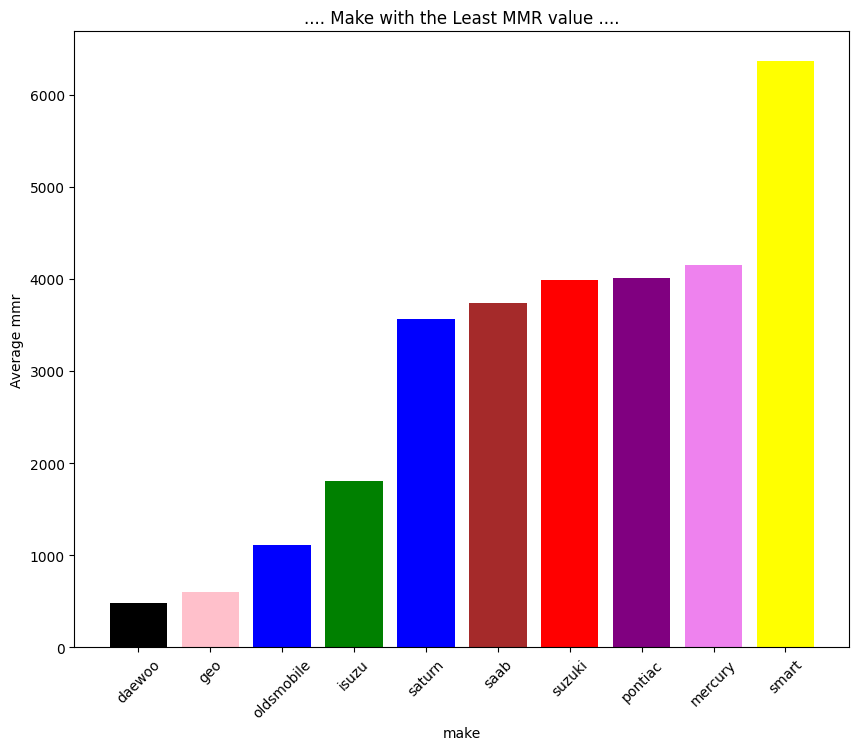

In [90]:
plt.figure(figsize=(10,8))
plt.bar(make_mmr_l['make'], make_mmr_l['mmr'], color=['black','pink','blue','green','blue','brown','red','purple','violet','yellow'])
plt.tick_params(axis='x', rotation=45)
plt.xlabel('make')
plt.ylabel('Average mmr')
plt.title('.... Make with the Least MMR value ....')

In [91]:
# the daewoo car has the least mmr value of 487.5

In [92]:
# A total number of 48 car make had loss in their sales
# A total number of 5 cars make had profit in their sales

2. Analyzing the <code>Model</code> Features

In [93]:
# Questions to answer:
# i. Top 10 models with the highest sales count
# ii. Top 10 models with the highest selling price

In [94]:
# i. Top 10 models with the highest sales count
df3.model.value_counts().reset_index().head(10)

,model,count
0,Altima,16346
1,Fusion,12116
2,F-150,11950
3,Camry,10986
4,Escape,10656
5,Focus,9547
6,Accord,8528
7,Impala,7500
8,3 Series,7132
9,Civic,7068


In [95]:
# the Altima model of the nissa has the highest sale count of 16346 cars
# we can also go forward to know the make of the Altima model car

In [96]:
# determining the make
df3.groupby(['make','model'])['year'].count().reset_index().sort_values(by='year', ascending=False).head(10)

,make,model,year
585,nissan,Altima,16346
262,ford,Fusion,12116
249,ford,F-150,11950
707,toyota,Camry,10986
240,ford,Escape,10656
258,ford,Focus,9547
307,honda,Accord,8528
142,chevrolet,Impala,7500
52,bmw,3 Series,7132
312,honda,Civic,7068


In [97]:
# We can conclude that the Altima, Fusion, F-150 Camry, Escape Focus, Accord, Impala, 3 Series and the Civic model are mostly bought, having a sale count value of 7 to 16 thousand sales across the models.
# they are of the Nissan, ford, toyota, cheverolet, bmw and honda

In [98]:
# ii. Top 10 models with the highest selling price

In [99]:
model_sellp = df3.groupby(['make','model'])['sellingprice'].mean().reset_index().sort_values(by='sellingprice', ascending=False).head(10)
model_sellp

,make,model,sellingprice
220,ferrari,458 Italia,183000.000000
543,mercedes-benz,SLS AMG GT,156500.000000
81,bmw,i8,154222.222222
655,rolls-royce,Ghost,153456.250000
221,ferrari,California,131846.153846
542,mercedes-benz,SLS AMG,116016.666667
422,lamborghini,Gallardo,111500.000000
48,bentley,Continental GTC Speed,111000.000000
222,ferrari,F430,106250.000000
44,bentley,Continental Flying Spur Speed,105750.000000


In [100]:
# the 458 italia Ferrari car has the highest sellingprice

3. Analyzing the <code>Trim</code> Features

In [101]:
# Questions to be answered:
# i. How many Category of trim do we have in total
# ii. Top 10 trim that is highly purchased and which make and model are they
# iii. Also the trim level as related to their average mmr

In [102]:
# i. How many Category of trim do we have in total
df3.trim.value_counts().reset_index() # we are having about 1494 categories of trim level

,trim,count
0,Base,48779
1,SE,39633
2,LX,18706
3,Limited,15506
4,LT,15273
...,...,...
1489,HD LS,1
1490,Luxury II,1
1491,Spider F1,1
1492,Premium Fleet,1


In [103]:
# ii. Top 10 trim that is highly purchased and which make and model are they
df3.groupby(['make','model','trim'])['year'].count().reset_index().sort_values(by='year', ascending=False).head(10)

,make,model,trim,year
2465,nissan,Altima,2.5 S,9586
1226,ford,Fusion,SE,7885
1194,ford,Focus,SE,7464
1157,ford,F-150,XLT,5486
2464,nissan,Altima,2.5,5370
3064,toyota,Camry,LE,5285
939,dodge,Grand Caravan,SXT,4153
3090,toyota,Corolla,LE,3931
850,chrysler,Town and Country,Touring,3865
1557,hyundai,Elantra,GLS,3803


In [104]:
# The 2.5 S, SE, XLT, 2.5, LE, Touring, GLS trim level are the top 10 trim levels that are higly purchased
# they are of the nissan, toyota, dodge, chrysler and hyundai car make.

In [105]:
# iii. Also the trim level as related to their average mmr
df3.groupby(['make','trim'])['mmr'].mean().reset_index().sort_values(by='mmr', ascending=False).head(10)

,make,trim,mmr
1401,rolls-royce,EWB,164000.000000
1400,rolls-royce,Base,154200.000000
476,ferrari,Base,137142.857143
109,bentley,V8,136500.000000
923,land-rover,Autobiography LWB,135000.000000
478,ferrari,Spider F1,128000.000000
1170,mercedes-benz,S63 AMG 4MATIC,123500.000000
1122,mercedes-benz,G63 AMG,117500.000000
916,lamborghini,Spyder,113666.666667
942,land-rover,Supercharged LWB,107285.714286


In [106]:
# Remember that the rolls-royce had the higest average selling price and even the mmr value
# Now we can see that they are of the EWR and the Base trim level category of the rolls-royce.

4. Analyzing the <code>Transmission</code> Features

In [107]:
# Questions to answer:
# i. How many transmission category do we have
# ii. Which is the most sold transmission
# iii. Whats the average mmr value for the transmission
# iv. which of the transmission has the highest average sale amount 

In [108]:
# i. How many transmission category do we have
df3.transmission.unique() # we have two transmission categories

array(['automatic', 'manual'], dtype=object)

In [109]:
#ii. Which is the most sold transmission
trans_ = df3.transmission.value_counts().reset_index()
trans_

,transmission,count
0,automatic,455963
1,manual,16362


<Axes: ylabel='count'>

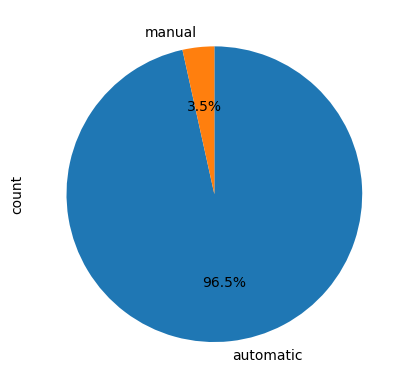

In [110]:
df3.transmission.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False)

In [111]:
# we observed that 96.5% of the sales are mostly automatic transmision which is a total of 455,963 sales
# while 3.5% is for manual transmission and a total of 16,362 sales

In [112]:
# iii. Which transmisson has the highest mmr i.e wholesale value
trans_mmr = round(df3.groupby('transmission')['mmr'].mean().reset_index(), 2)
trans_mmr

,transmission,mmr
0,automatic,13916.05
1,manual,11635.86


Text(0, 0.5, 'MMR')

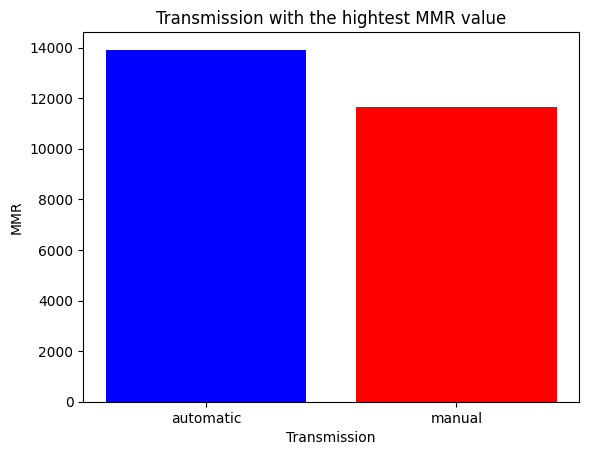

In [113]:
plt.bar(trans_mmr['transmission'], trans_mmr['mmr'], color=['blue','red'])
plt.title('Transmission with the hightest MMR value')
plt.xlabel('Transmission')
plt.ylabel('MMR')


In [114]:
# we can say that the cars with automatic transmission are quite expensive or have the highest mmr value of 13916.05 in our dataset 

In [115]:
# iv. which of the transmission has the highest average sale amount 
trans_sal = round(df3.groupby('transmission')['sellingprice'].mean().reset_index(),2)
trans_sal

,transmission,sellingprice
0,automatic,13774.51
1,manual,11349.72


Text(0, 0.5, 'Selling Price')

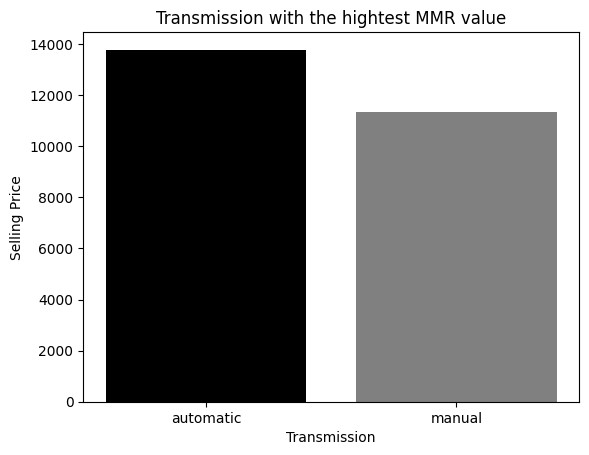

In [116]:
plt.bar(trans_sal['transmission'], trans_sal['sellingprice'], color=['black','grey'])
plt.title('Transmission with the hightest MMR value')
plt.xlabel('Transmission')
plt.ylabel('Selling Price')


In [117]:
# the cars that are of automatic transmission categories has an average selling price of 13774.51 USD over that of manual transmission which has about 11349.72 USD

In [118]:
# In the dataset, much loss was incured by the manual vehicle than that of the automatic transmission vehicles

5. Analyzing the <code>State</code>Features

In [119]:
# Questions to answer:
# i. The state that purchased more cars and their preferred transmission category
# ii. The state with the highest amount spent

In [120]:
df3.state.unique()

array(['ca', 'tx', 'mn', 'az', 'wi', 'tn', 'md', 'pa', 'fl', 'ne', 'oh',
       'mi', 'nj', 'va', 'sc', 'in', 'il', 'co', 'ut', 'mo', 'ga', 'nv',
       'ma', 'pr', 'nc', 'ny', 'or', 'la', 'wa', 'hi', 'ok', 'ms', 'nm',
       'al'], dtype=object)

In [121]:
df3.state.nunique() # we have a total number of 34 states in our dataset

34

In [122]:
# i. Top 10 state that purchased more cars and their preferred transmission category
state_count = df3.state.value_counts().reset_index().sort_values(by='count', ascending=False).head(10)
state_count

,state,count
0,fl,75243
1,ca,66213
2,tx,41657
3,ga,30939
4,pa,24117
5,nj,23003
6,il,21494
7,oh,20294
8,tn,19183
9,nc,18731


Text(0.5, 1.0, '....Top 10 state that purchased more cars ....')

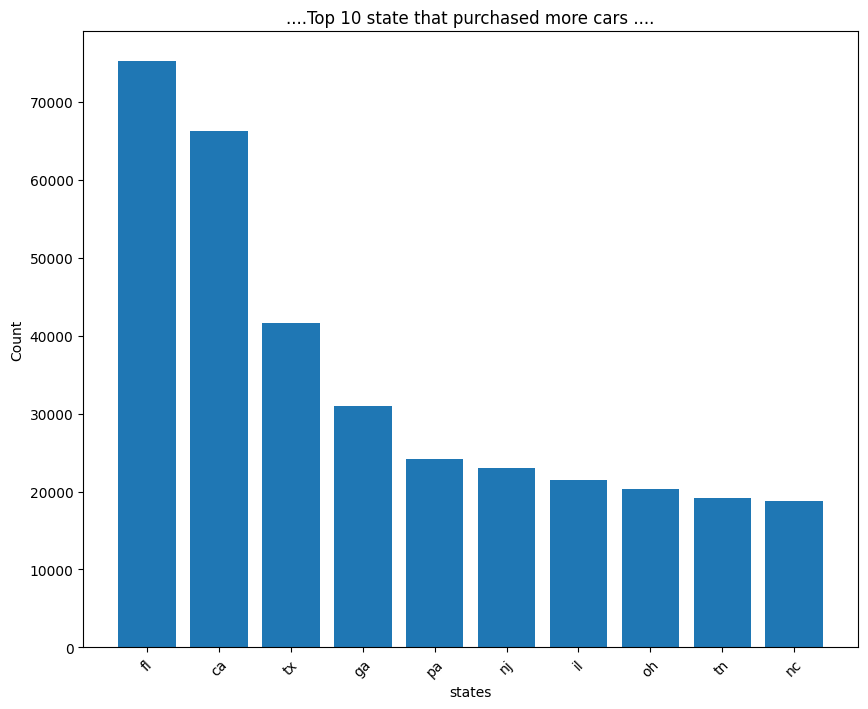

In [123]:
plt.figure(figsize=(10,8))
plt.bar(state_count['state'], state_count['count'])
plt.tick_params(axis='x', rotation=45)
plt.xlabel('states')
plt.ylabel('Count')
plt.title('....Top 10 state that purchased more cars ....')

In [124]:
# the people residing in florida (fl) purchased more vehicles of about 75,243

In [125]:
# ii. The state with the highest amount spent and their preferred transmission category
state_spent = df3.groupby(['state'])['sellingprice'].mean().reset_index().sort_values(by='sellingprice', ascending=False)
state_spent

,state,sellingprice
28,tn,17285.152896
3,co,15745.498405
20,nv,15576.319380
7,il,15404.136968
12,mi,15182.068946
2,ca,14895.258650
14,mo,14694.777771
22,oh,14459.130975
4,fl,14331.417953
32,wa,14327.867798


In [126]:
# now lets get their preferred transmission cars
df3.groupby(['state','transmission'])['sellingprice'].mean().reset_index().sort_values(by='sellingprice', ascending=False)

,state,transmission,sellingprice
56,tn,automatic,17311.615237
57,tn,manual,16249.633891
6,co,automatic,15902.117304
40,nv,automatic,15657.196000
14,il,automatic,15443.309790
...,...,...,...
63,va,manual,5796.845124
23,md,manual,5588.557484
21,ma,manual,4955.845070
1,al,manual,3450.000000


In [127]:
# from our dataset, we can understand that resident of Tennessee (tn) spend more on cars
# they spent there money on automatic more than manual

6. Analyzing the <code>condition</code>Features

In [128]:
# Questions to answer:
# i. How many condition category do we have in our dataset
# ii. Relationship between the condition and the selling price
# iii. which condition type is sold the most

In [129]:
# i. How many condition category do we have in our dataset
df3.condition.unique()

array([ 5., 45., 41., 43.,  1., 34.,  2., 42.,  3., 48., 49., 17., 19.,
       29., 38., 44., 47., 32.,  4., 25., 37., 39., 31., 28., 46., 35.,
       26., 21., 36., 22., 27., 24., 33., 23., 16., 18., 12., 14., 11.,
       13., 15.])

In [130]:
df3.condition.nunique() # there are 41 conditions in the dataset

41

In [131]:
# ii. correlation between the condition to the selling price
corr = df3[['condition','sellingprice']]

In [132]:
corr_ = corr.corr()
corr_

,condition,sellingprice
condition,1.000000,0.317712
sellingprice,0.317712,1.000000


Text(0.5, 1.0, 'Correlation Matric between the condition and the sellingprice')

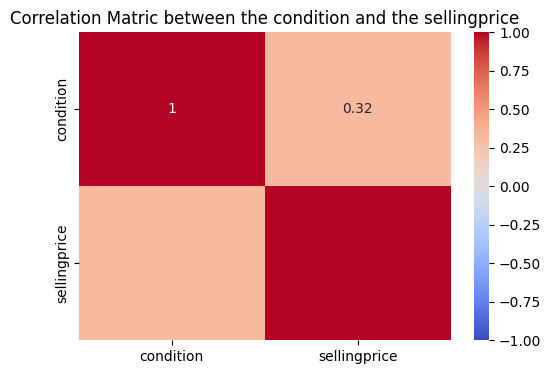

In [133]:
#plotting the correlation matrics on the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matric between the condition and the sellingprice')

In [134]:
# from the above we see that the condition is correlated to the sellingprice
# its of moderate positive correlation of 0.32 correlation value
# i.e if the condition value is high, the sellingprice will be high

In [135]:
# iii. which condition type is sold the most
cond_ = df3.condition.value_counts().reset_index()
cond_.condition = cond_.condition.astype(int)
cond_

,condition,count
0,19,36647
1,35,23209
2,37,22680
3,44,22091
4,43,21593
5,42,21094
6,36,20164
7,41,19889
8,39,17567
9,2,17248


Text(0.5, 1.0, '....most sold vehicle based on their condition ....')

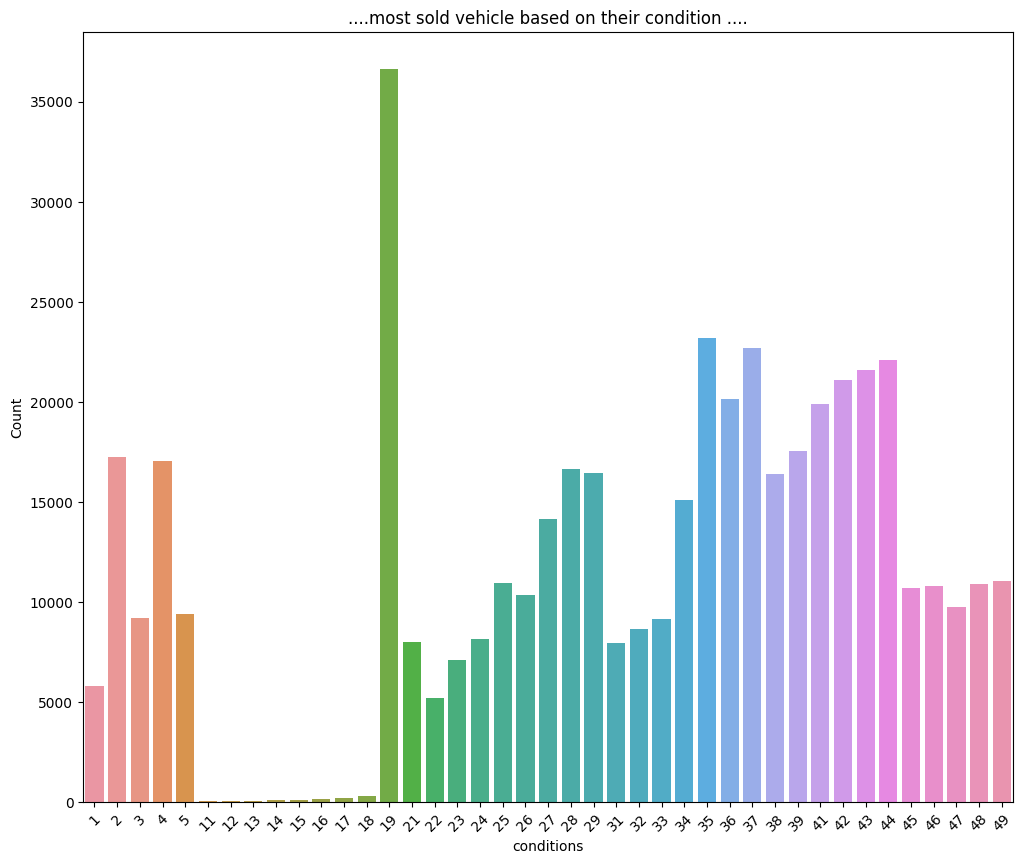

In [136]:
plt.figure(figsize=(12,10))
sns.barplot(x=cond_['condition'], y=cond_['count'])
plt.tick_params(axis='x', rotation=45)
#plt.xscale('linear')
#plt.xticks(range(cond_.condition.min(), cond_.condition.max() + 1))
plt.xlabel('conditions')
plt.ylabel('Count')
plt.title('....most sold vehicle based on their condition ....')

In [137]:
# vehicle of condition 19 is being sold the most, of about 36,647


# Analyzing further, we noticed that the vehicle with condition state of 19 is has the highest sale count.
# why ?
# What are the possible reasons ?
# From our analysis we noticed that the condition is correlated to the sellingprice
# and i beleive most people will wont to purchase a car with the best condition state.
# so we need to analyse:
# Out of the 36,647 vehicle, which is the Top 5 vehicle with the highest count, and the make, 
# In what year were they bought most, 
# which month, 
# is there any discounted price at that time ?

#### vehicles of condition 11 to 18 has a list sales count of 79,86,74,116,116,151,209 respectively.
#### This can be investigated



In [138]:
#Analyzing the vehicle with condition rate 19

In [139]:
# Now lets check the Top 5 vehicls and make

In [140]:
df3_cond_19 = df3[df3['condition'] == 19]
top_5_cond19 = df3_cond_19.groupby(['make','model'])['Year'].count().reset_index().sort_values(by='Year', ascending=False).head()
top_5_cond19

,make,model,Year
222,honda,Accord,1262
428,nissan,Altima,1200
226,honda,Civic,1039
84,chevrolet,Impala,1003
526,toyota,Camry,895


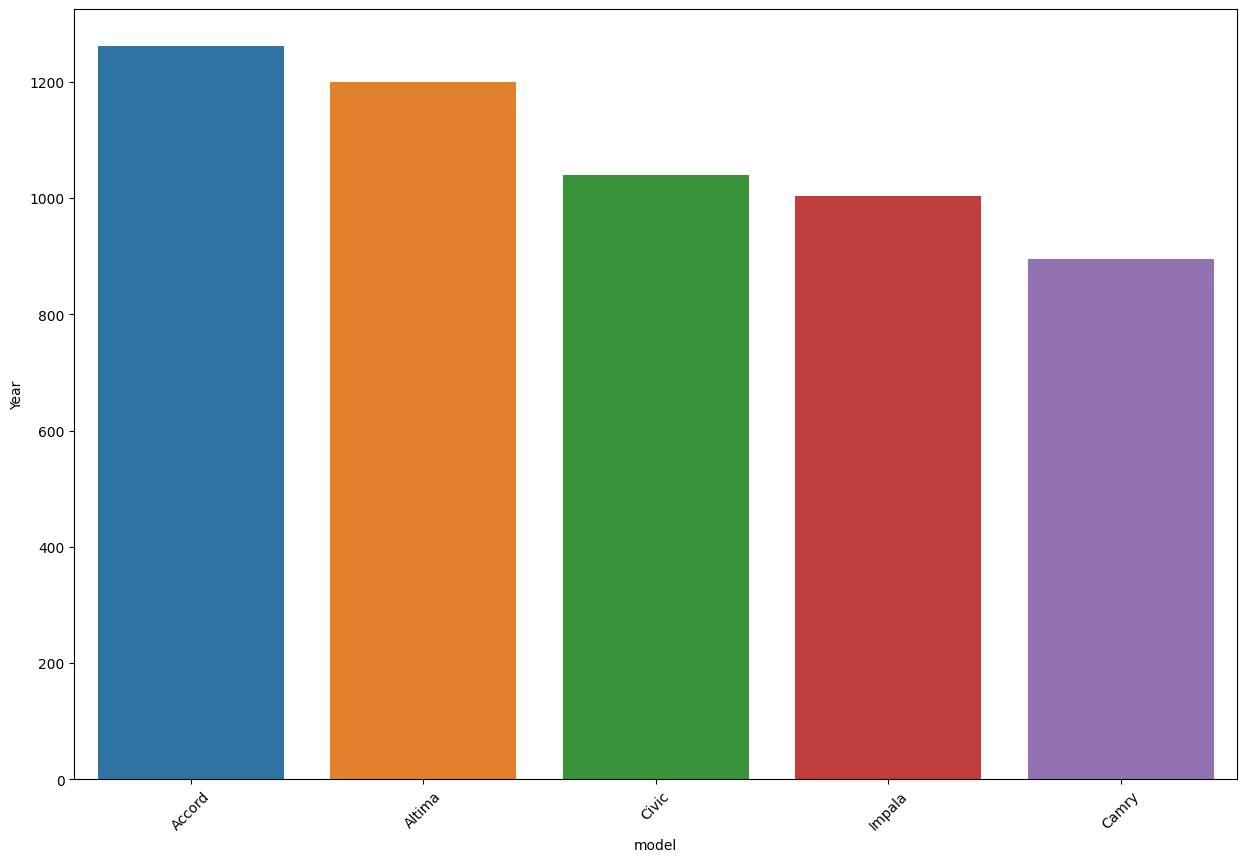

In [141]:
plt.figure(figsize=(15,10))
sns.barplot(x=top_5_cond19['model'], y=top_5_cond19['Year'])
plt.tick_params(axis='x', rotation=45)

In [142]:
# AS we can see, the Honda - Accord, nissan - Attima, honda - civic, chevrolet - impala, and toyota - camry are the top 5 cars with condition 19 that are highly purchased

In [143]:
# In what year were they bought most 

In [144]:
df3_19_year = df3_cond_19.groupby('Year')['model'].count().reset_index()
df3_19_year

,Year,model
0,2014,3288
1,2015,33359


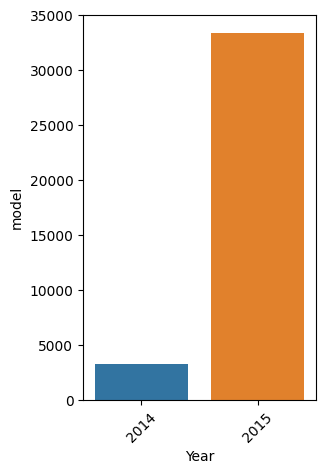

In [145]:
plt.figure(figsize=(3,5))
sns.barplot(x=df3_19_year['Year'], y=df3_19_year['model'])
plt.tick_params(axis='x', rotation=45)

In [146]:
# even though the vehicles with condition rate 19 was purchased in both 2014 and 2015,
# its being purchased more in the year 2015, with 33,359 vehicles sold

In [147]:
# which month
df3_19_month = df3_cond_19.groupby(['sale_month_num','sale_month'])['model'].count().reset_index()
df3_19_month = df3_19_month.set_index('sale_month_num')
df3_19_month

,sale_month,model
sale_month_num,,
1,January,9279
2,February,10895
3,March,3283
4,April,188
5,May,3790
6,June,5865
7,July,70
12,December,3277


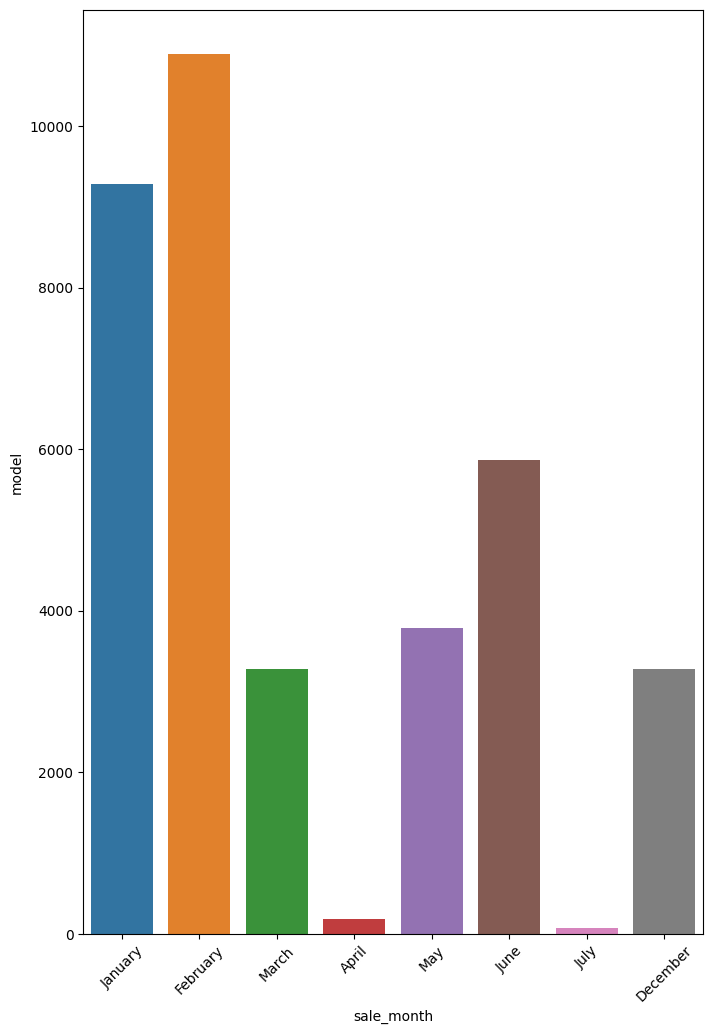

In [148]:
plt.figure(figsize=(8,12))
sns.barplot(x=df3_19_month['sale_month'], y=df3_19_month['model'])
plt.tick_params(axis='x', rotation=45)

In [149]:
# The vehicle with condition rating 19 were bought more in the month of February, which is in the year 2015

In [150]:
# is there any discounted price at that time 
# Now in answering this question, 
# we need to analysis the February sale for the year 2015 of the vehicles of condition rating 19
# comparing their mmr and their sellingprice

In [151]:
df3_cond_19_mmr_sellp = df3[(df3['condition'] == 19) & (df3['Year'] == 2015) & (df3['sale_month'] == 'February')]
df3_cond_19_mmr_sellp

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,SaleDate,sale_weekDay,sale_weekDay_num,sale_month,sale_month_num,Year,time_hr
1332,2012,hyundai,Genesis,3.8,sedan,automatic,kmhgc4dd6cu193175,ca,19.0,29454.0,black,black,the hertz corporation,19300.0,14400.0,2015-02-04 19:30:00+00:00,Wednesday,2,February,2,2015,19:30:00
1577,2012,nissan,Maxima,3.5 S,sedan,automatic,1n4aa5ap0cc842808,ca,19.0,57933.0,blue,black,the hertz corporation,15100.0,10000.0,2015-02-04 19:30:00+00:00,Wednesday,2,February,2,2015,19:30:00
1622,2012,nissan,Sentra,2,sedan,automatic,3n1ab6ap4cl679178,ca,19.0,61044.0,blue,gray,remarketing by ge/flagship credit acceptance,8600.0,5000.0,2015-02-03 20:30:00+00:00,Tuesday,1,February,2,2015,20:30:00
3128,2008,ford,Fusion,S,sedan,automatic,3fahp06z88r191463,ca,19.0,101943.0,blue,gray,auto finance solutions dba abc remarketing,4375.0,3800.0,2015-02-11 20:00:00+00:00,Wednesday,2,February,2,2015,20:00:00
4376,2005,nissan,Titan,XE,king-cab,automatic,1n6aa06a65n524648,ca,19.0,195970.0,black,gray,marquinas enterprises,2675.0,2300.0,2015-02-04 20:00:00+00:00,Wednesday,2,February,2,2015,20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382128,2004,nissan,Altima,2.5,sedan,automatic,1n4al11d44c180953,ca,19.0,148800.0,gray,black,v p motor sales inc,2575.0,2200.0,2015-02-26 23:00:00+00:00,Thursday,3,February,2,2015,23:00:00
382141,2003,chevrolet,Silverado 2500HD,LT,crew-cab,automatic,1gchk23113f149080,nv,19.0,111392.0,gray,gray,kapitolia auto llc,17350.0,16400.0,2015-02-26 20:00:00+00:00,Thursday,3,February,2,2015,20:00:00
382168,2003,nissan,Murano,SE,suv,automatic,jn8az08t13w105788,nv,19.0,122835.0,blue,black,chapmans las vegas dodge,4150.0,4800.0,2015-02-26 20:00:00+00:00,Thursday,3,February,2,2015,20:00:00
382264,2000,chevrolet,Malibu,Base,sedan,automatic,1g1nd52j2y6338949,ca,19.0,99673.0,gold,beige,topaz financial services,1275.0,450.0,2015-02-26 23:00:00+00:00,Thursday,3,February,2,2015,23:00:00


In [152]:
# applying groupby to check the average mmr and selling price
round(df3_cond_19_mmr_sellp.groupby('condition')[['mmr','sellingprice']].mean(),2)

,mmr,sellingprice
condition,,
19.0,5975.16,5072.89


In [153]:
# from the above we can see that the mmr value is 5975.16 and the sellingprice is 5,072.89
# we can therefore conclude that most likely that the condition rating 19 vehicle had the highest purchase count 
# because it was sold lesser price compared to the mmr value in the year and month it dominated in sales

7. Analyzing the <code>SaleDate</code>Features

In [154]:
df3.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,SaleDate,sale_weekDay,sale_weekDay_num,sale_month,sale_month_num,Year,time_hr
0,2015,kia,Sorento,LX,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 04:30:00+00:00,Tuesday,1,December,12,2014,04:30:00
1,2015,kia,Sorento,LX,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 04:30:00+00:00,Tuesday,1,December,12,2014,04:30:00


In [155]:
# Questions to answer:
# i. Day trend on number of sales, purchase amount
# ii. Months ....
# iii. year ....
# iv. the time with the highest selling price 

In [156]:
# lets confirm how many days, months, year we have across our dataset
df3.sale_weekDay.unique()


array(['Tuesday', 'Wednesday', 'Thursday', 'Monday', 'Friday', 'Sunday'],
      dtype=object)

In [157]:
# from the dataset, we noticed that no vehicle was sold on saturdays

In [158]:
df3.sale_month.unique()

array(['December', 'January', 'July', 'February', 'May', 'June', 'March',
       'April'], dtype=object)

In [159]:
# the sales months excludes from August to November

In [160]:
df3.Year.unique()

array([2014, 2015])

In [161]:
# it sales covers year 2014 and 2015

In [162]:
# i. Day trend on number of sales, sales amount
# number of sales
days_sales = df3.groupby(['sale_weekDay_num','sale_weekDay'])['make'].count().reset_index()
days_sales.set_index('sale_weekDay_num')

,sale_weekDay,make
sale_weekDay_num,,
0,Monday,116695
1,Tuesday,163480
2,Wednesday,129671
3,Thursday,46580
4,Friday,5246
6,Sunday,10653


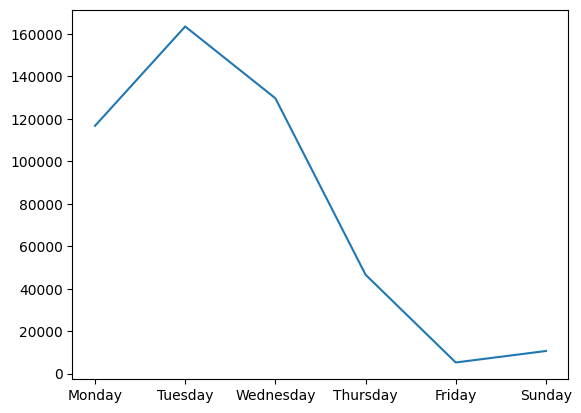

In [163]:
plt.plot(days_sales['sale_weekDay'], days_sales['make'])

In [164]:
# Tuesday made the highest sales of 163,480 in our dataset

In [165]:
# sales amount
days_sales_amount = round(df3.groupby(['sale_weekDay_num','sale_weekDay'])['sellingprice'].mean().reset_index(),2)
days_sales_amount.set_index('sale_weekDay_num')

,sale_weekDay,sellingprice
sale_weekDay_num,,
0,Monday,13400.88
1,Tuesday,13648.52
2,Wednesday,14268.37
3,Thursday,13614.80
4,Friday,14003.91
6,Sunday,10650.53


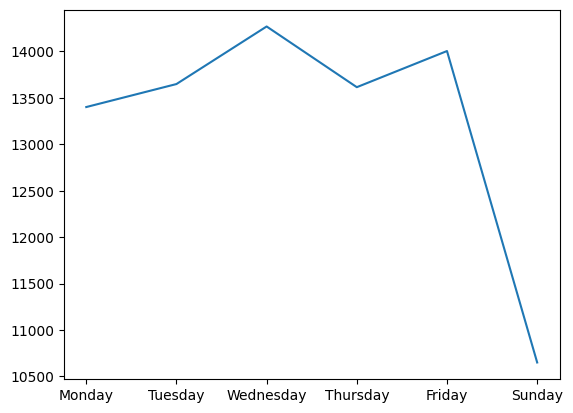

In [166]:
plt.plot(days_sales_amount['sale_weekDay'], days_sales_amount['sellingprice'])

In [167]:
# highest sale is mostly on Wednessdays and the least sale is on sundays

In [168]:
df3.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'SaleDate', 'sale_weekDay', 'sale_weekDay_num',
       'sale_month', 'sale_month_num', 'Year', 'time_hr'],
      dtype='object')

In [169]:
# ii. Month trend on number of sales, selling price
# number of sales
month_sales = df3.groupby(['sale_month_num','sale_month'])['make'].count().reset_index()
month_sales.set_index('sale_month_num')

,sale_month,make
sale_month_num,,
1,January,121399
2,February,142338
3,March,40647
4,April,1217
5,May,44228
6,June,84822
7,July,1074
12,December,36600


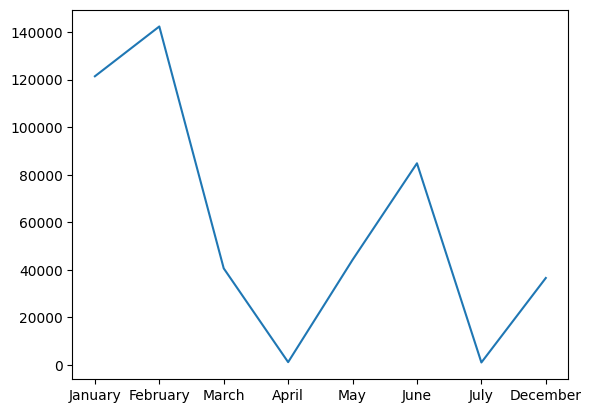

In [170]:
plt.plot(month_sales['sale_month'], month_sales['make'])

In [171]:
# there was a downward trend in sales from february, and later went up in june but down in july, there was no sale from august to November

In [172]:
# selling price
month_amount = round(df3.groupby(['sale_month_num','sale_month'])['sellingprice'].mean().reset_index(),2)
month_amount.set_index('sale_month_num')

,sale_month,sellingprice
sale_month_num,,
1,January,13272.92
2,February,13613.10
3,March,13475.66
4,April,9989.05
5,May,13945.49
6,June,14829.19
7,July,16899.08
12,December,12697.17


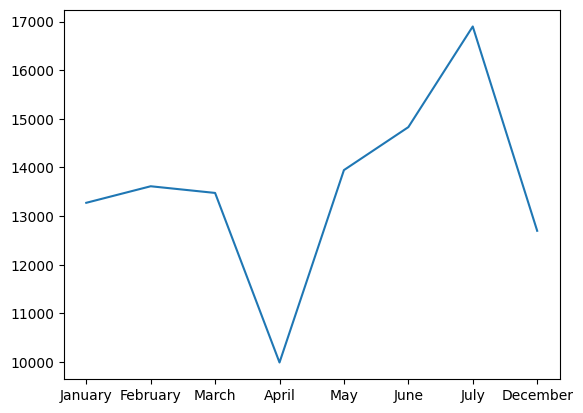

In [173]:
plt.plot(month_amount['sale_month'], month_amount['sellingprice'])

In [174]:
# ther was an upward trend from april which was downward from january, but from april to july the selling price increased upwardly

In [175]:
# iii. Year trend on number of sales, selling price
#number of sales
year_sales = df3.groupby(['Year'])['make'].count().reset_index()
year_sales

,Year,make
0,2014,36789
1,2015,435536


<BarContainer object of 2 artists>

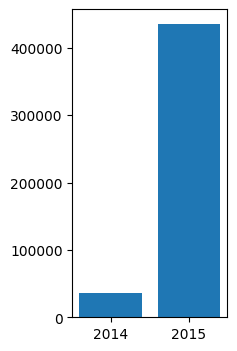

In [176]:
#will be using bar plot for this
plt.figure(figsize=(2,4))
plt.bar(year_sales['Year'], year_sales['make'])

In [177]:
# year 2015 made the highest sales of vehicle, we can say there is an increase trend from 2014 to 2015

In [178]:
# selling price
year_amount = round(df3.groupby(['Year'])['sellingprice'].mean().reset_index(),2)
year_amount

,Year,sellingprice
0,2014,12713.69
1,2015,13773.02


<BarContainer object of 2 artists>

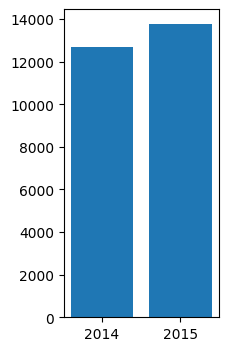

In [179]:
plt.figure(figsize=(2,4))
plt.bar(year_amount['Year'], year_amount['sellingprice'])

In [180]:
# year 2015 made the highest selling price of vehicle, we can say there is an increase trend from 2014 to 2015

In [181]:
# iv. the time with the highest selling price
# we need to slice our the only the hour for the time not the entire time
df3['hr'] = df3.SaleDate.dt.hour

In [182]:
time_sellp = round(df3.groupby('hr')['sellingprice'].mean().reset_index().sort_values(by='hr', ascending=True), 2)
time_sellp

,hr,sellingprice
0,0,13675.81
1,1,12404.47
2,2,11102.04
3,3,11654.47
4,4,13018.60
5,5,8566.87
6,6,18636.88
7,7,9232.80
8,8,10591.07
9,9,3945.93


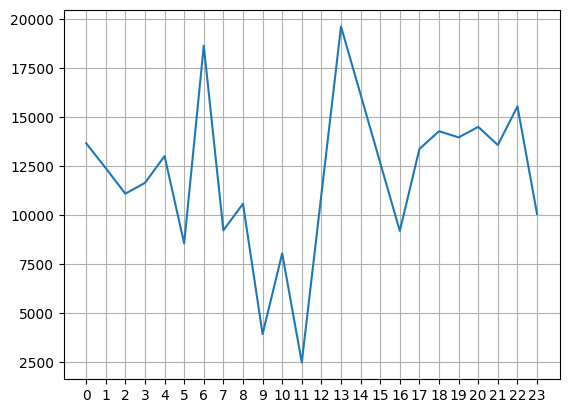

In [183]:
plt.plot(time_sellp['hr'], time_sellp['sellingprice'])
plt.xscale('linear')
plt.xticks(range(time_sellp.hr.min(), time_sellp.hr.max()+1))
plt.grid(True)

In [184]:
# it was observed that sales at the 13:00:00 hrs has the highest sellingprice

7. Analyzing the <code>Odometer</code>Feature

In [185]:
# what is the correlation between the odometer reading and the selling price
df3.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'SaleDate', 'sale_weekDay', 'sale_weekDay_num',
       'sale_month', 'sale_month_num', 'Year', 'time_hr', 'hr'],
      dtype='object')

In [186]:
corr_od = df3[['odometer','sellingprice']]
corr_mat = corr_od.corr()
corr_mat

,odometer,sellingprice
odometer,1.000000,-0.577397
sellingprice,-0.577397,1.000000


Text(0.5, 1.0, 'Correlation Matric between the odometer and the sellingprice')

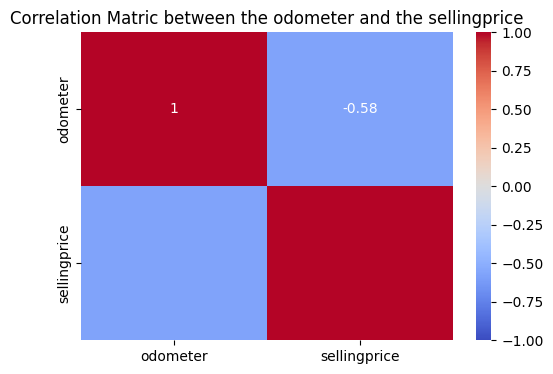

In [187]:
#plotting the correlation matrics on the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matric between the odometer and the sellingprice')

In [188]:
# from the visualization, we can see that the odometer has a strong negetive correlation with the selling price.
# i.e if the odometer reading increases, the selling price reduces and vice versa.
# we can say that cars that has been driven for long will really decrease in selling price compared to ones that has lower odometer 

8. Analyzing the <code>Seller</code>Feature

In [189]:
df3.seller.unique()

array(['kia motors america  inc',
       'financial services remarketing (lease)',
       'volvo na rep/world omni', ..., 'maserati north america inc',
       'alternative financial group inc', 'i -5 uhlmann rv'], dtype=object)

In [190]:
df3.seller.nunique() # we have about 11,923 sellers

11923

In [191]:
# Questions to answer:
# Top 5 best sellers with highest sales count
# Top 5 best sellers with highest selling price

In [192]:
# Top 5 best sellers with highest sales count

best_seller = df3.seller.value_counts().reset_index().head(5)
best_seller

,seller,count
0,ford motor credit company llc,17756
1,the hertz corporation,16286
2,nissan-infiniti lt,15777
3,santander consumer,14245
4,avis corporation,11471


<BarContainer object of 5 artists>

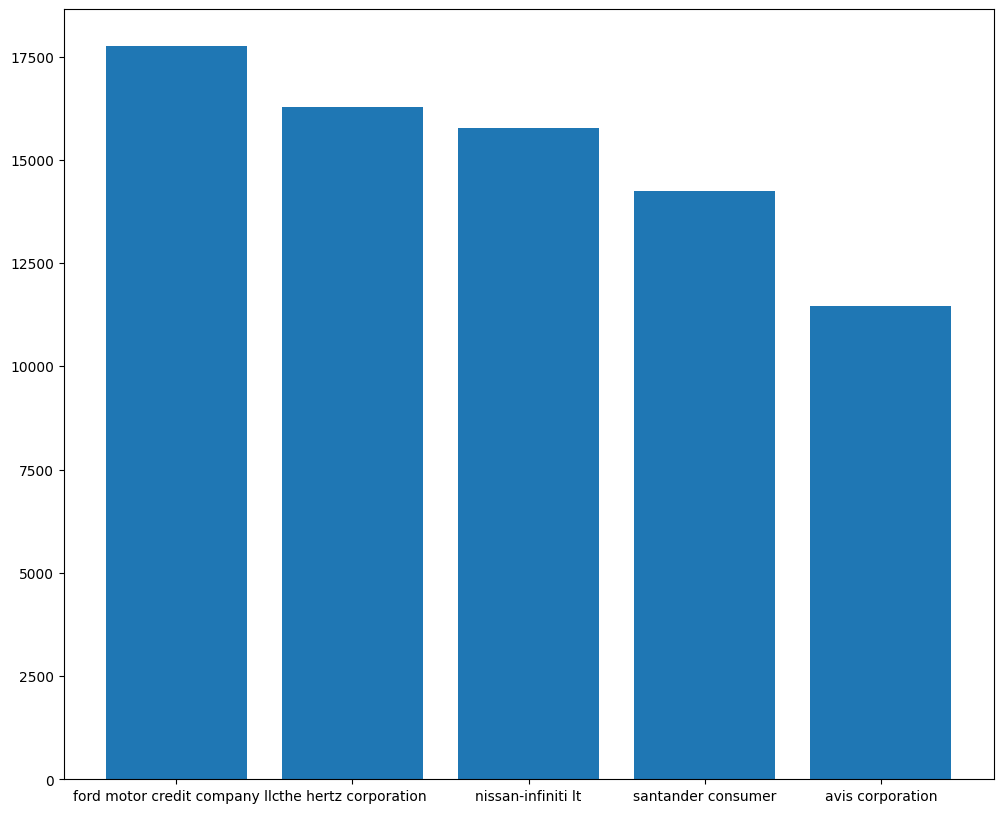

In [193]:
plt.figure(figsize=(12,10))
plt.bar(best_seller['seller'], best_seller['count'])

In [194]:
# the ford motor credit company llc had the highest sales of 17,756 vehicles

In [195]:
# Top 5 best sellers with highest sellingprice
best_seller = round(df3.groupby('seller')['sellingprice'].mean().reset_index().sort_values(by='sellingprice', ascending=False).head(5), 2)
best_seller

,seller,sellingprice
8398,phelps auto sales,161000.0
4088,financial services remarketing (bmw int),153125.0
1020,autolink sales llc,134500.0
2531,chings trading,134000.0
2221,carbiz solutions inc.,133000.0


## General insights and results gotten from the data analysis and visualization process

1. KPI's:
 - Total number of Sales: 472,325 USD
 - Total Sales Amount: 6,466,371,108 USD
 - Total MMR value: 6,535,588,875 USD
 - Average Sales Amount: 13,837.06 USD
 - Average MMR: 13,690.51 USD

* We had approximately 1.06% discount of the total mmr value from the total selling price which is count 69,217,767 USD

* Reason for the discount is that the rating  condition and other feature are positive correlated to the selling price i.e if the feature value is low, the selling price will be low  and vice versa

2. Top 10 Make with the hightest sales count: from the visualization we can see the top 10 most purchase vehicle but ford is the highest with 81,013 vehicles purchased
<br>

3. Top 10 Make with the hightest average selling price: from the visualization we can also see the top 10 wehicles with the highest averaage selling price but that of the rolls-royce has the highest Average sellingprice of 153,456.25 USD
<br>

4. Top 10 make with the highest Average MMR value: among the top 10, the rolls-royce car has the highest mmr value of 154,812.50 USD we can also say that its the most expensive car bought for the manufacturer in our dataset.
<br>

5. List 10 car make with the Least Average MMR value: it was also noticed that the daewoo car has the least mmr value of 487.5 
<br>

6. Top 10 models with the highest sales count: the Altima model of the nissa make has the highest sale count of 16346 purchased out of the other 9 car models
<br>

* The 458 italia Ferrari car has the highest sellingprice

7. How many Category of trim do we have in total: we have about 1494 categories of trim level
<br>

8. Top 10 trim that is highly purchased and which make and model are they: The cars having the following tim level: 2.5 S, SE, XLT, 2.5, LE, Touring, GLS trim level are the top 10 trim levels that are higly purchased they are of the nissan, toyota, dodge, chrysler and hyundai car make.
<br>

9. Also the trim level as related to their average mmr: Remember that the rolls-royce had the higest average selling price and even the mmr value, Now we can see that they are of the EWR and the Base trim level category of the rolls-royce.
<br>

10. How many transmission category do we have: 2- automatic and manual
<br>

11. Which is the most sold transmission: It was observed that 96.5% of the sales are mostly automatic transmision which is a total of 455,963 sales while 3.5% is for manual transmission and a total of 16,362 sales
<br>

12. Whats the average mmr value for the transmission: The cars with automatic transmission are quite expensive or have the highest mmr value of 13916.05 in our dataset 
<br>

13. which of the transmission has the highest average sale amount: The cars that are of automatic transmission categories has an average selling price of 13774.51 USD over that of manual transmission which has about 11349.72 USD.
<br>

14. which of the transmission has the highest average sale amount: The cars with automatic transmission are quite expensive or have the highest mmr value of 13916.05 in our dataset. 
<br>

15. The state that purchased more cars: we have a total number of 34 states in our dataset, the people residing in florida (fl) purchased more vehicles of about 75,243 in our dataset.
<br>

16. The state with the highest amount spent: # from our dataset, we can understand that resident of Tennessee (tn) spend more on cars they spent there money on automatic more than manual.
<br>

17. How many condition category do we have in our dataset: we have 41 different condition state
<br>

18. Relationship between the vehicle condition and the selling price: from the dataset, we noticed that the condition is correlated to the sellingprice and its of moderate positive correlation with 0.32 correlation value.
    
    i.e if the condition value is best/high, the sellingprice will be high
    <br>
    
19. which condition type is sold the most: vehicle of condition 19 is being sold the most, of about 36,647, this could be because of various reason, perphase the odemeta value, color, or moderate selling price.
<br>

20. Day trend on number of sales, selling price: 

    a. It was noticed that saturday had no sales, tuesday made the highest sales of 163,480 in our dataset.
    
    b. highest sale is mostly on Wednessdays and the least sale is on sundays.
    
    c. it was observed that sales at the 13:00:00 hrs they had the highest sellingprice
<br>     

    
21. Months trend on number of sales, purchase amount:
    
    a. there was a downward trend in sales from february, and later went up in june but down in july, there was no sale from august to November
    
    b. there was an upward trend from april which was downward from january, but from april to july the sales amount increased upwardly.
<br>

22. year trend on number of sales, purchase amount.
    
    a. year 2015 made the highest sales count of vehicle, we can say there is an increase trend from 2014 to 2015
    
    b. year 2015 has the highest sellingprice of vehicle, we can say there is an increase trend from 2014 to 2015
    
25. What is the correlation between the odometer reading and the selling price: from the visualization, we can see that the odometer has a strong negetive correlation with the selling price. i.e if the odometer reading increases, the selling price reduces and vice versa. We can say that cars that has been driven for long will really decrease in selling price compared to ones that has lower odometer
<br>

25. Top 5 best sellers with highest sales count: ford motor credit company llc, the hertz corporation, nissan-infiniti lt, santander consumer, and avis corporation are the top 5 best sellers with 17756,	16286, 15777, 14245, and 11471 number of vehicles purchased respectively
<br>
	
26. Top 5 best sellers with highest sellingprice

THERE ARE OTHER FEATURES THAT CAN BE ANALYZE TO GET MORE INSIGHTS IF DESIRED

### Machine Learning 

In [196]:
df4 = df3.copy()
df4.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,SaleDate,sale_weekDay,sale_weekDay_num,sale_month,sale_month_num,Year,time_hr,hr
0,2015,kia,Sorento,LX,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 04:30:00+00:00,Tuesday,1,December,12,2014,04:30:00,4
1,2015,kia,Sorento,LX,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 04:30:00+00:00,Tuesday,1,December,12,2014,04:30:00,4
2,2014,bmw,3 Series,328i SULEV,sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14 20:30:00+00:00,Wednesday,2,January,1,2015,20:30:00,20
3,2015,volvo,S60,T5,sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-28 20:30:00+00:00,Wednesday,2,January,1,2015,20:30:00,20
4,2014,bmw,6 Series Gran Coupe,650i,sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 04:30:00+00:00,Thursday,3,December,12,2014,04:30:00,4


In [197]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   year              472325 non-null  int64              
 1   make              472325 non-null  object             
 2   model             472325 non-null  object             
 3   trim              472325 non-null  object             
 4   body              472325 non-null  object             
 5   transmission      472325 non-null  object             
 6   vin               472325 non-null  object             
 7   state             472325 non-null  object             
 8   condition         472325 non-null  float64            
 9   odometer          472325 non-null  float64            
 10  color             472325 non-null  object             
 11  interior          472325 non-null  object             
 12  seller            472325 non-null  object        

In [198]:
df4.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'SaleDate', 'sale_weekDay', 'sale_weekDay_num',
       'sale_month', 'sale_month_num', 'Year', 'time_hr', 'hr'],
      dtype='object')

In [199]:
df4.color.unique()

array(['white', 'gray', 'black', 'red', 'silver', 'brown', 'beige',
       'blue', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

### EDA, checking for relationship across the various columns against the selling price

In [200]:
#### logically, i dont think its necessary to check for dat of vin, but we can still check if it has relationship with the selling price

In [201]:
cat_col = ['make','body','transmission','state','sale_weekDay','sale_month','hr','color','interior']
cat_col2 = ['model','trim','seller']
numeric_col = ['year','odometer','mmr','sellingprice','condition']

### checking the categorical columns

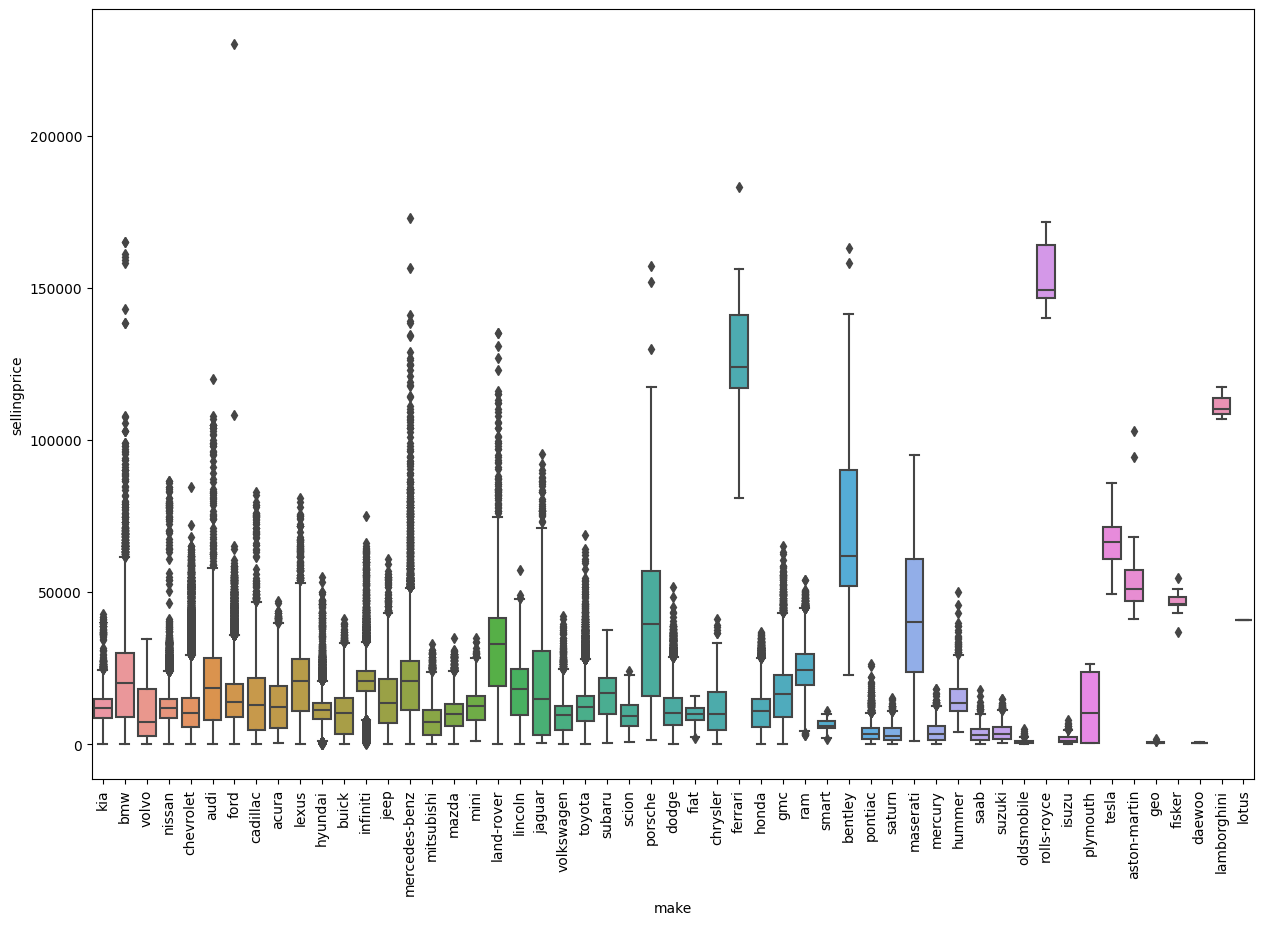

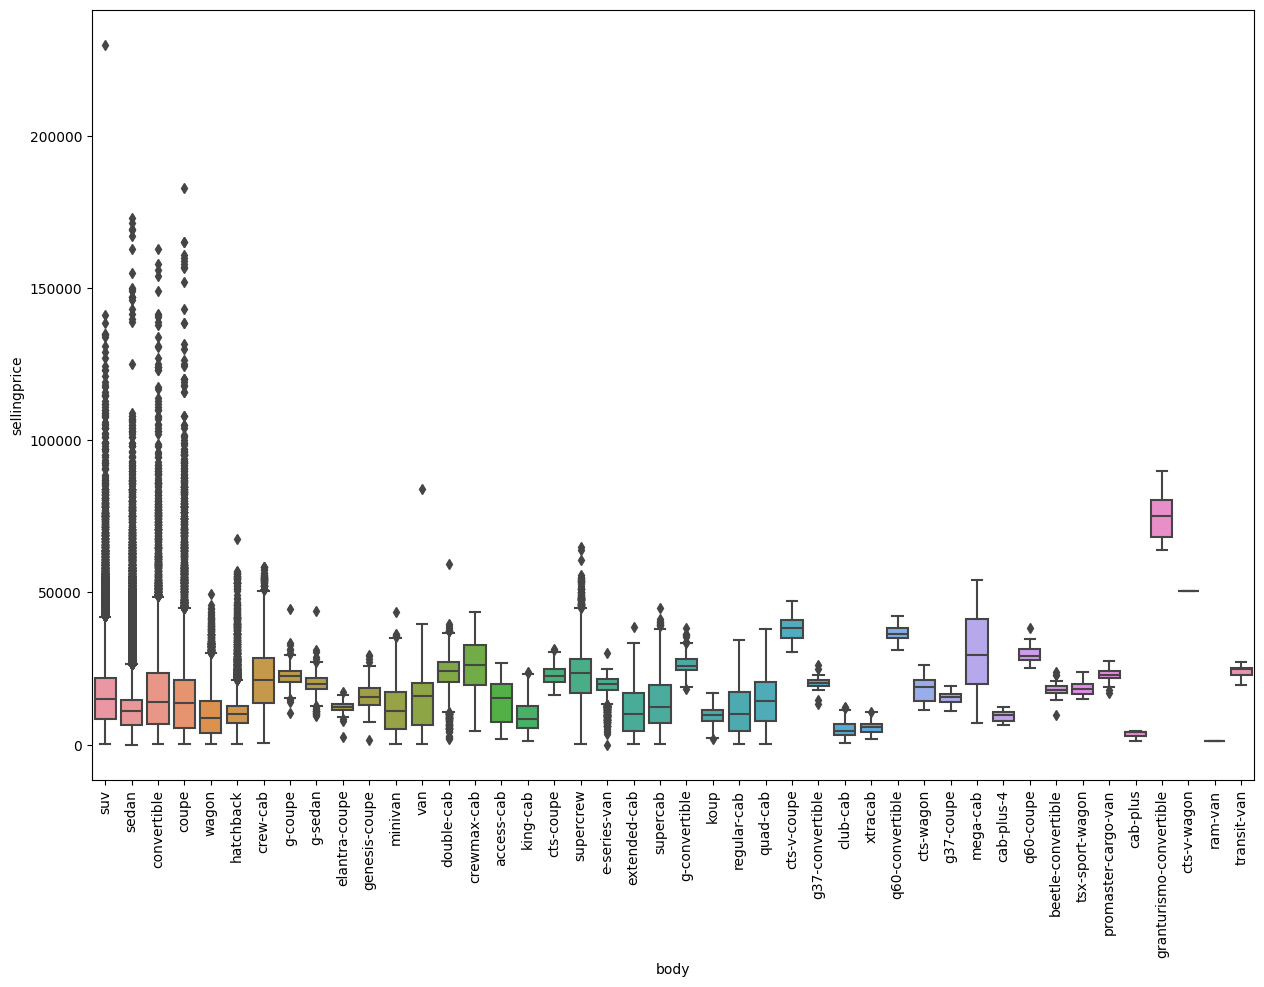

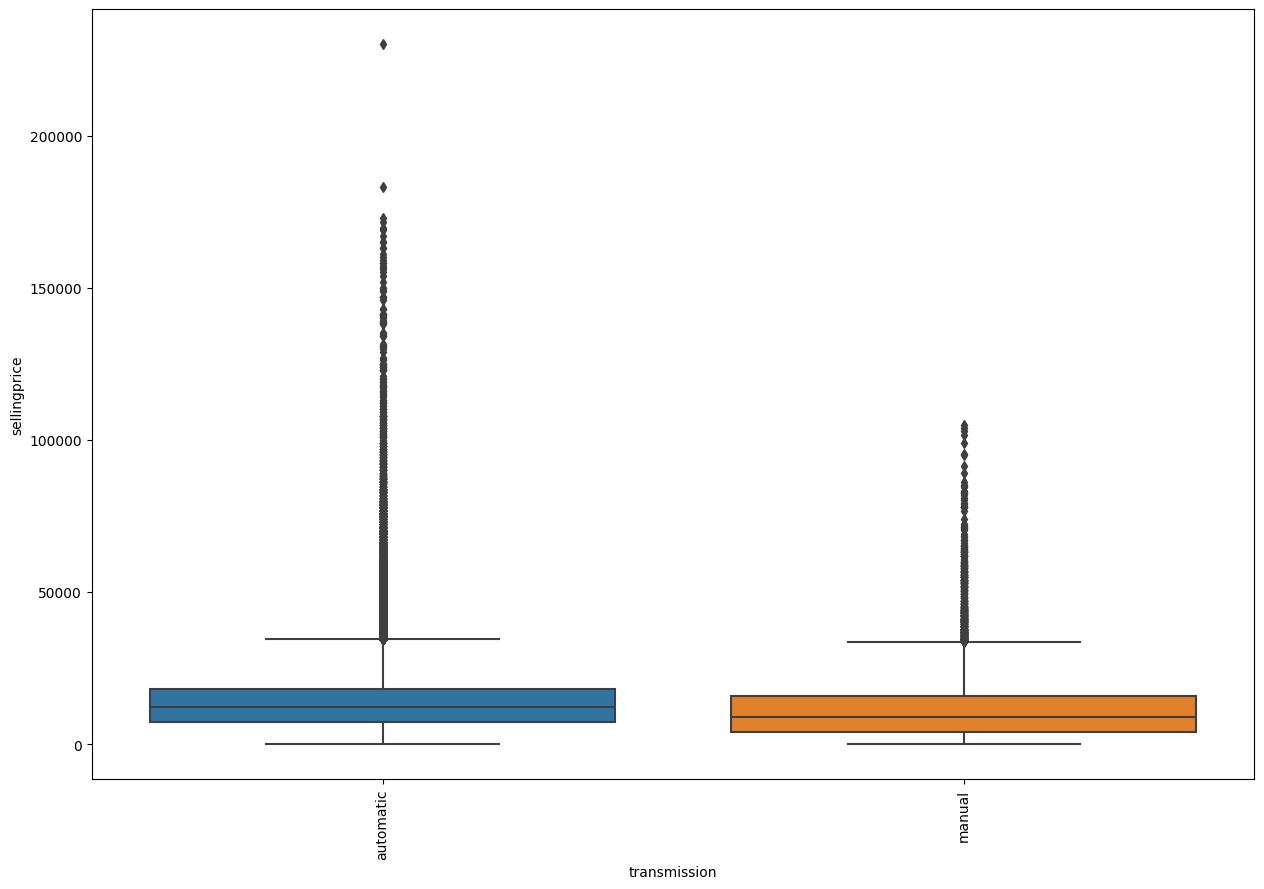

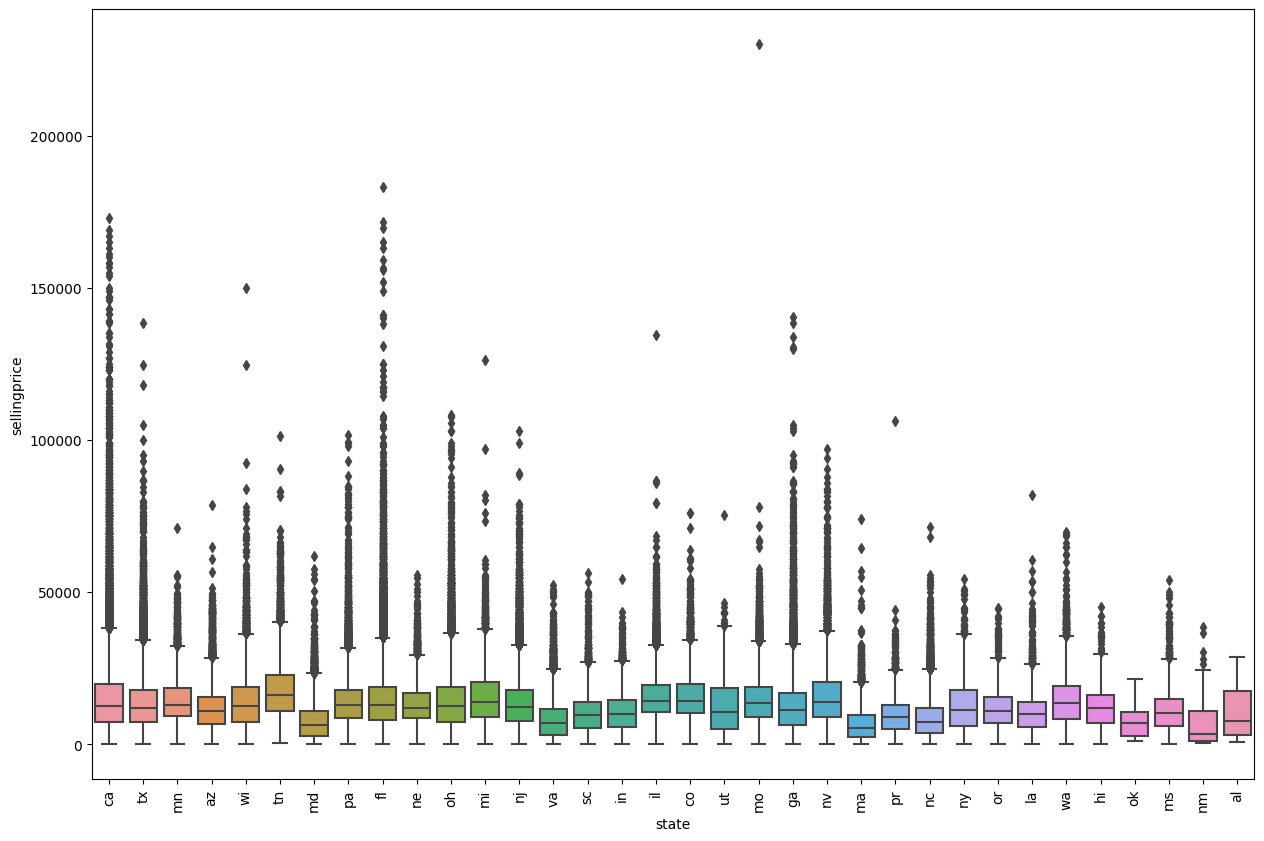

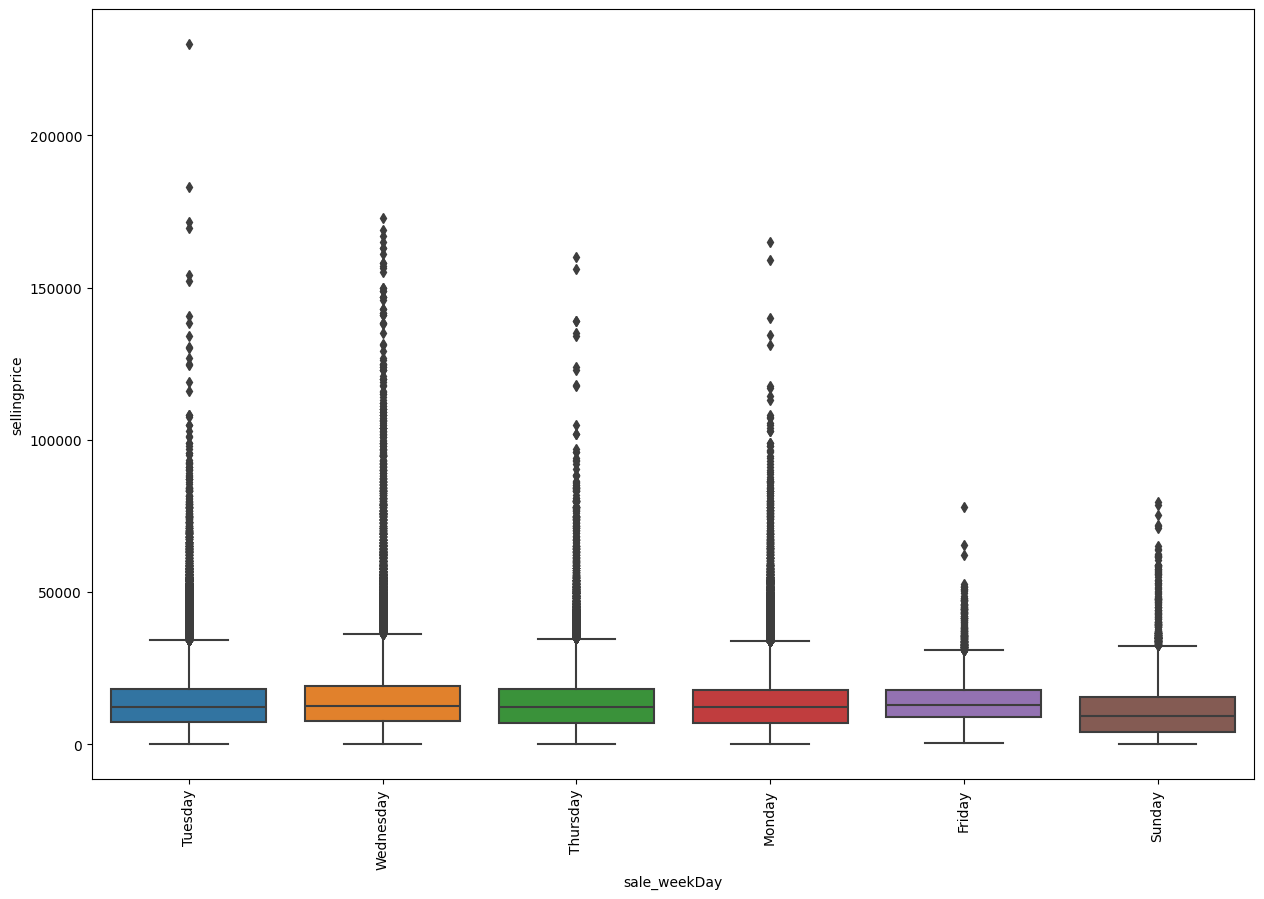

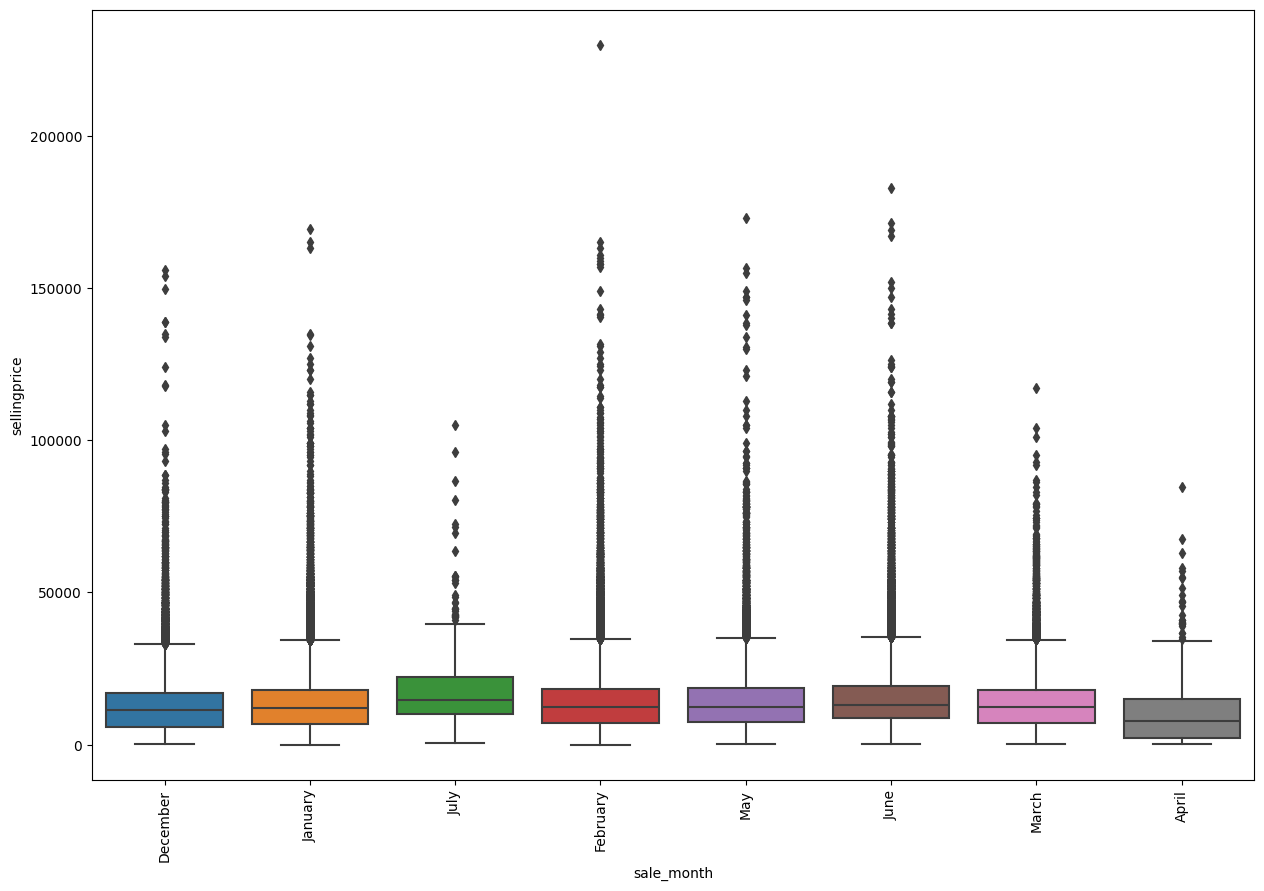

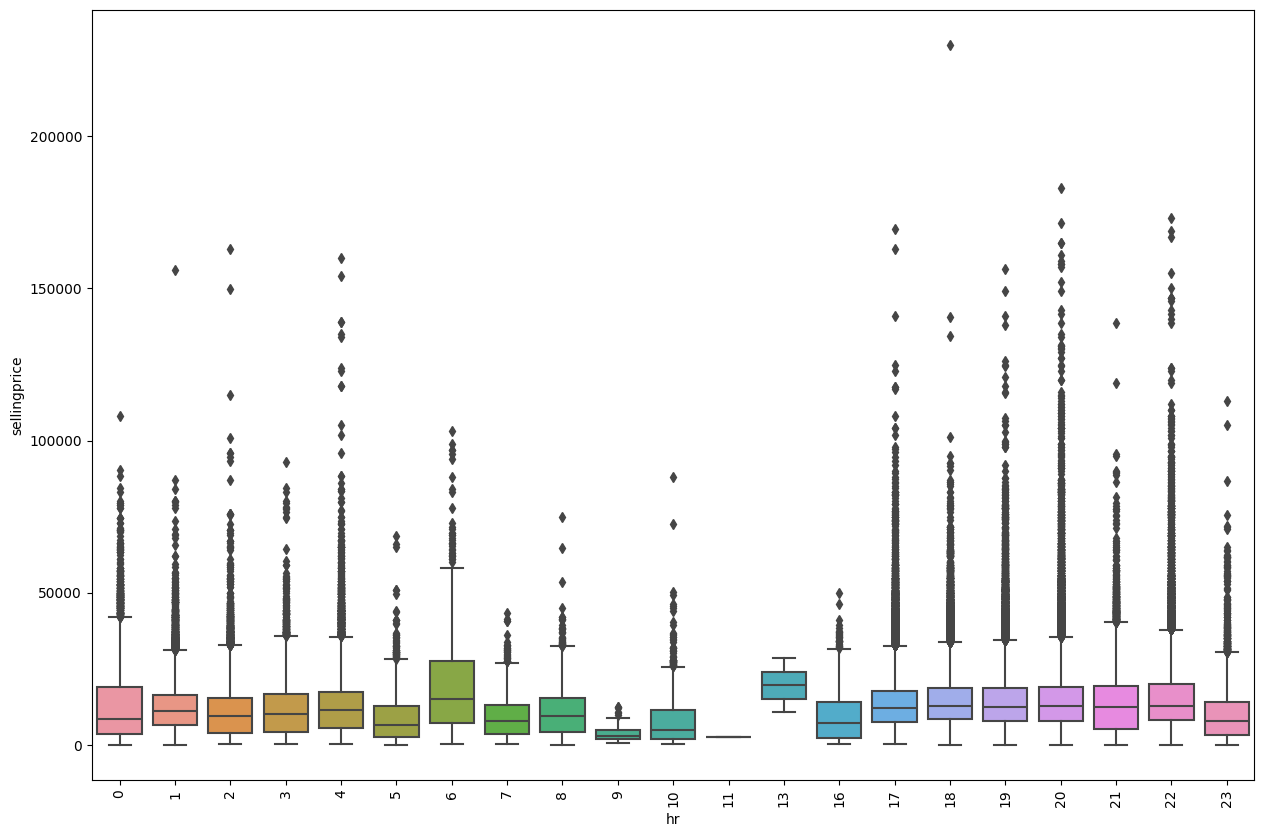

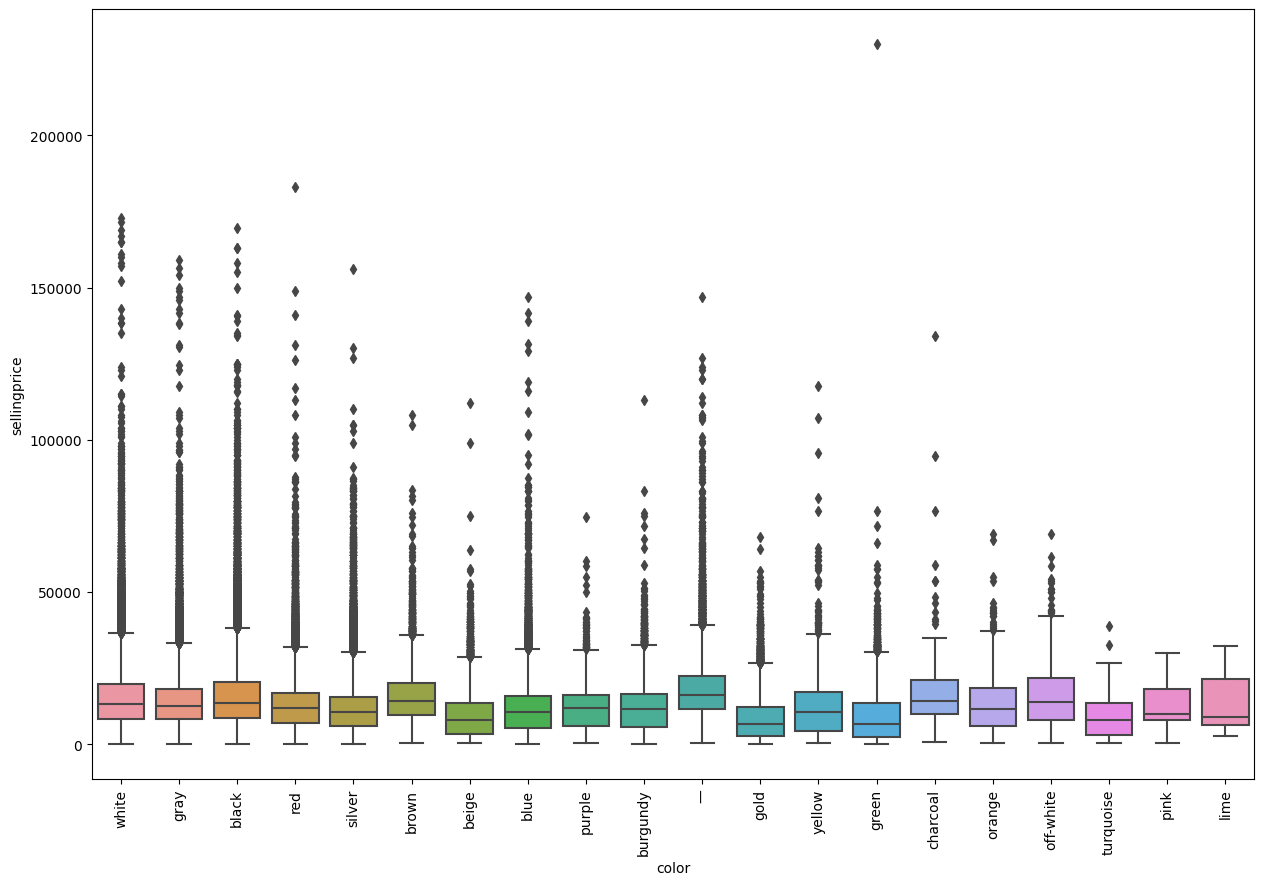

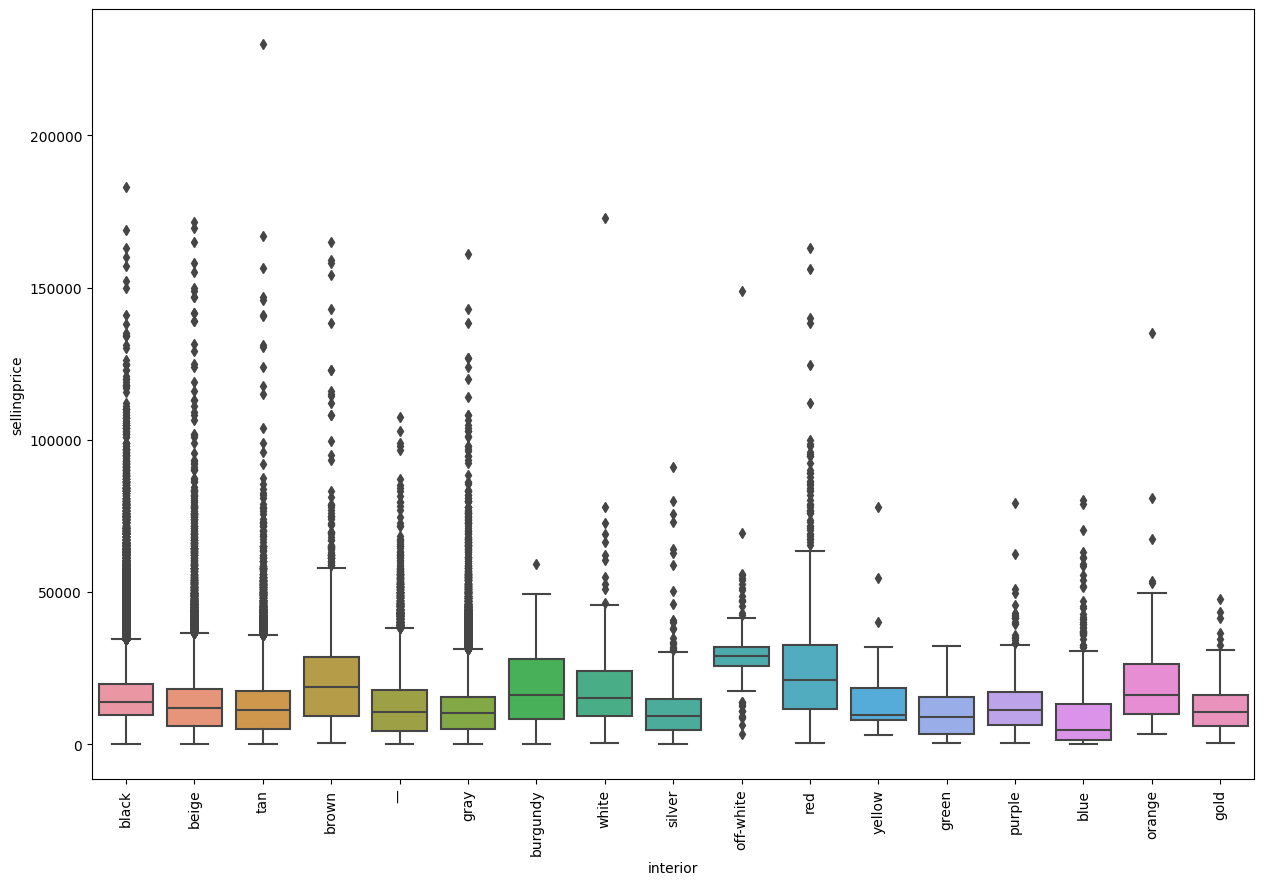

In [202]:
# using boxplot
for col in cat_col:
    plt.figure(figsize=(15,10))
    sns.boxplot(data=df4, x=col, y='sellingprice')
    plt.xticks(rotation=90)
    plt.show()

In [204]:
for col in cat_col2:
    print(df4.groupby(col)['sellingprice'].mean())

model
1 Series     19247.038567
1500         22770.766737
190-Class      708.333333
2 Series     38490.625000
200          10955.510094
                 ...     
mdx          23000.000000
tC            9337.909516
xA            2823.809524
xB            8018.591224
xD            9288.235294
Name: sellingprice, Length: 768, dtype: float64
trim
!                     8830.388471
(1999.5) XE           1720.000000
+                    12522.791637
1                     1490.340909
1.6                   4927.083333
                         ...     
xDrive35d            32366.991342
xDrive35i            36586.376673
xDrive35i Premium    33728.688525
xDrive48i            20023.958333
xDrive50i            38101.639344
Name: sellingprice, Length: 1494, dtype: float64
seller
1 cochran of monroeville     6424.248927
101motors                    3750.000000
143 auto sales inc           7787.500000
159191 canada inc           19431.018519
1st advantage fcu            9350.000000
                    

In [205]:
df.groupby('color')['sellingprice'].mean()

color
11034        13900.000000
1167         13200.000000
12655        13850.000000
14872        13700.000000
15719        13650.000000
16633        13600.000000
18384        13550.000000
18561        13200.000000
20379        13600.000000
20627        13600.000000
2172         14050.000000
2711         14250.000000
2817         13750.000000
2846         13600.000000
339          14300.000000
4802         13200.000000
5001         13400.000000
5705         13400.000000
6158         13650.000000
6388         13850.000000
6864         14000.000000
721          14100.000000
9410         13300.000000
9562         13200.000000
9837         13500.000000
9887         13900.000000
beige         9431.169269
black        15509.004749
blue         11440.609234
brown        15352.808099
burgundy     11902.997548
charcoal     16247.496868
gold          8324.714953
gray         13951.472880
green         8301.808733
lime         13256.666667
off-white    15230.229814
orange       12787.109240
pink  

### checking for numerical columns

In [206]:
df[numeric_col].corr()

,year,odometer,mmr,sellingprice,condition
year,1.000000,-0.772737,0.596631,0.586480,0.340320
odometer,-0.772737,1.000000,-0.588113,-0.582393,-0.318188
mmr,0.596631,-0.588113,1.000000,0.983635,0.281415
sellingprice,0.586480,-0.582393,0.983635,1.000000,0.321944
condition,0.340320,-0.318188,0.281415,0.321944,1.000000


<Axes: >

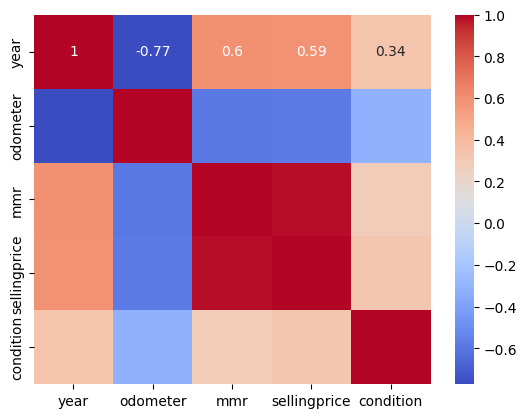

In [207]:
sns.heatmap(df[numeric_col].corr(), annot=True, cmap='coolwarm')

from the above, we can see that the following have relationship to the sellingprice: `year`, `make`, `trim`, `Body`, `condition`, `seller`, `trim`, `mmr`,`odometer`, `state`

we shall also apply domain knowlegde when dropping columns without relationship:
normally its known that the following has relationship with selling price in real life: `model`, `transmission`, and `color`, `interior`

The following columns will be dropped:
`vin`,`SaleDate`,`sale_weekDay`,`sale_weekDay_num`,`sale_month`, `sale_month_num`, `Year`, `time_hr`, `hr`,'seller'

In [208]:
df5 = df4.drop(columns=['vin','SaleDate','sale_weekDay','sale_weekDay_num','sale_month', 'sale_month_num', 'Year', 'time_hr', 'hr','seller'], axis=1)

In [209]:
df5.interior.unique()
df5['interior'] = df5['interior'].replace('—',np.NaN)
df5.dropna(inplace=True)

In [210]:
df5.color.unique()

array(['white', 'gray', 'black', 'red', 'silver', 'brown', 'beige',
       'blue', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [211]:
df5['color'] = df5['color'].replace('—',np.NaN)
df5.dropna(inplace=True)

In [212]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440393 entries, 0 to 558836
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440393 non-null  int64  
 1   make          440393 non-null  object 
 2   model         440393 non-null  object 
 3   trim          440393 non-null  object 
 4   body          440393 non-null  object 
 5   transmission  440393 non-null  object 
 6   state         440393 non-null  object 
 7   condition     440393 non-null  float64
 8   odometer      440393 non-null  float64
 9   color         440393 non-null  object 
 10  interior      440393 non-null  object 
 11  mmr           440393 non-null  float64
 12  sellingprice  440393 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 47.0+ MB


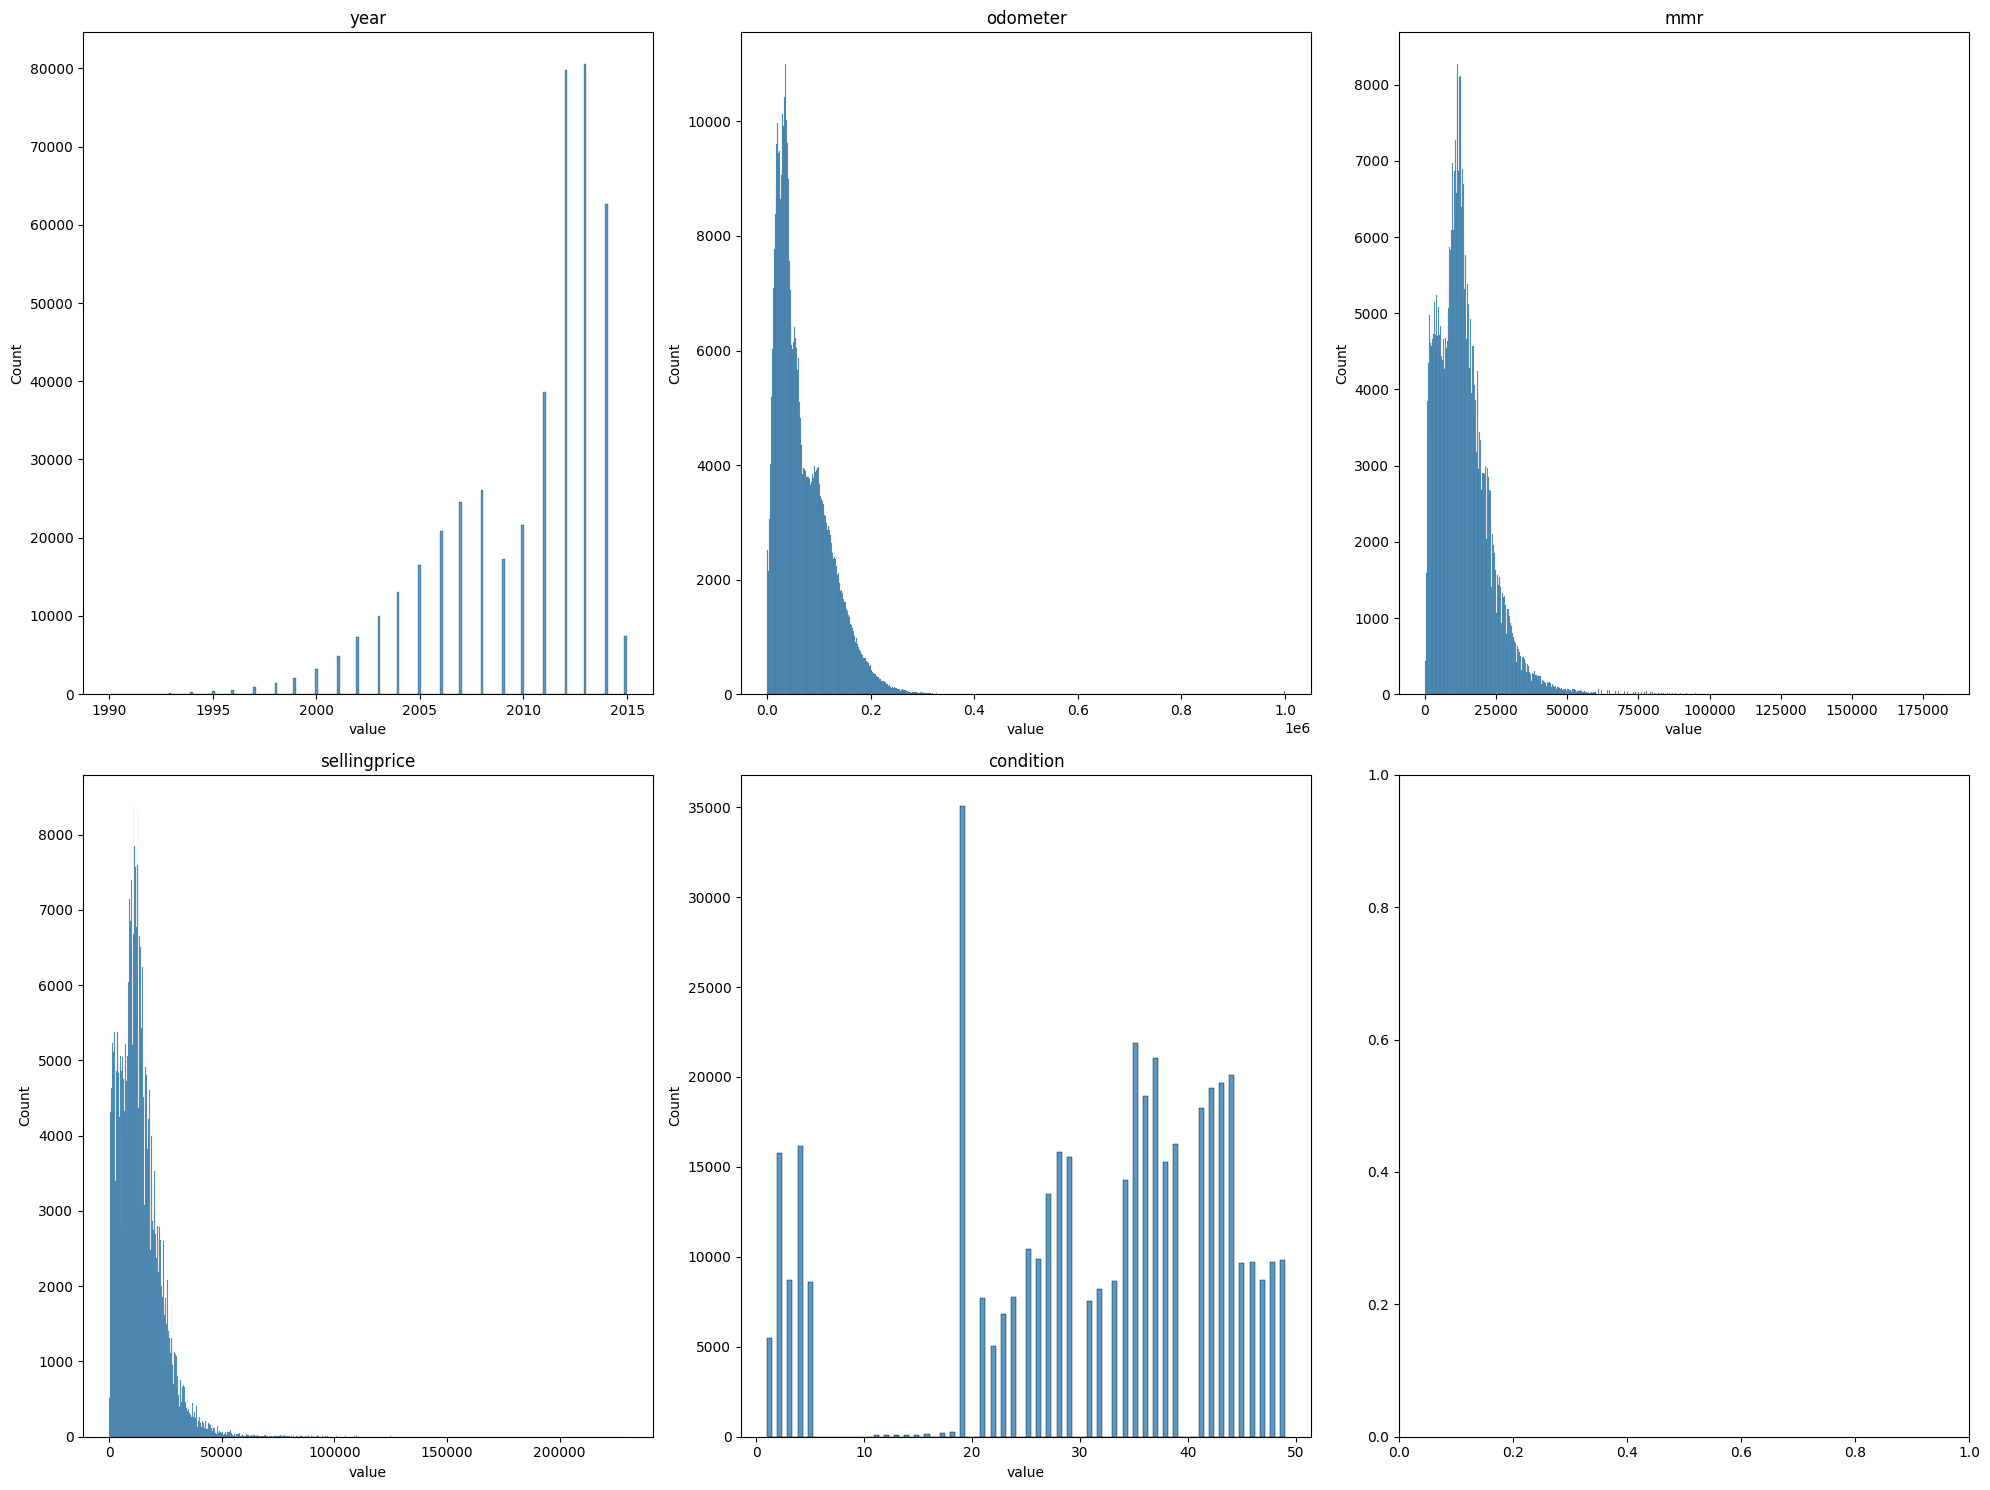

In [213]:
import math
# Plotting the numerical features
# histogram for the numeric features
num_features = len(numeric_col)
num_rows = 2 
num_cols = math.ceil(num_features/num_rows)

# create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,15))

#flatteb the axes if needed
if num_features > 1:
    axes = axes.flatten()
    
for i, columns in enumerate(numeric_col):
    axe = axes[i]
    sns.histplot(data=df5, x=columns, ax=axe)
    axe.set_title(f'{columns}')
    axe.set_xlabel('value')
    axe.set_ylabel('Count')
    
plt.tight_layout()
plt.show()

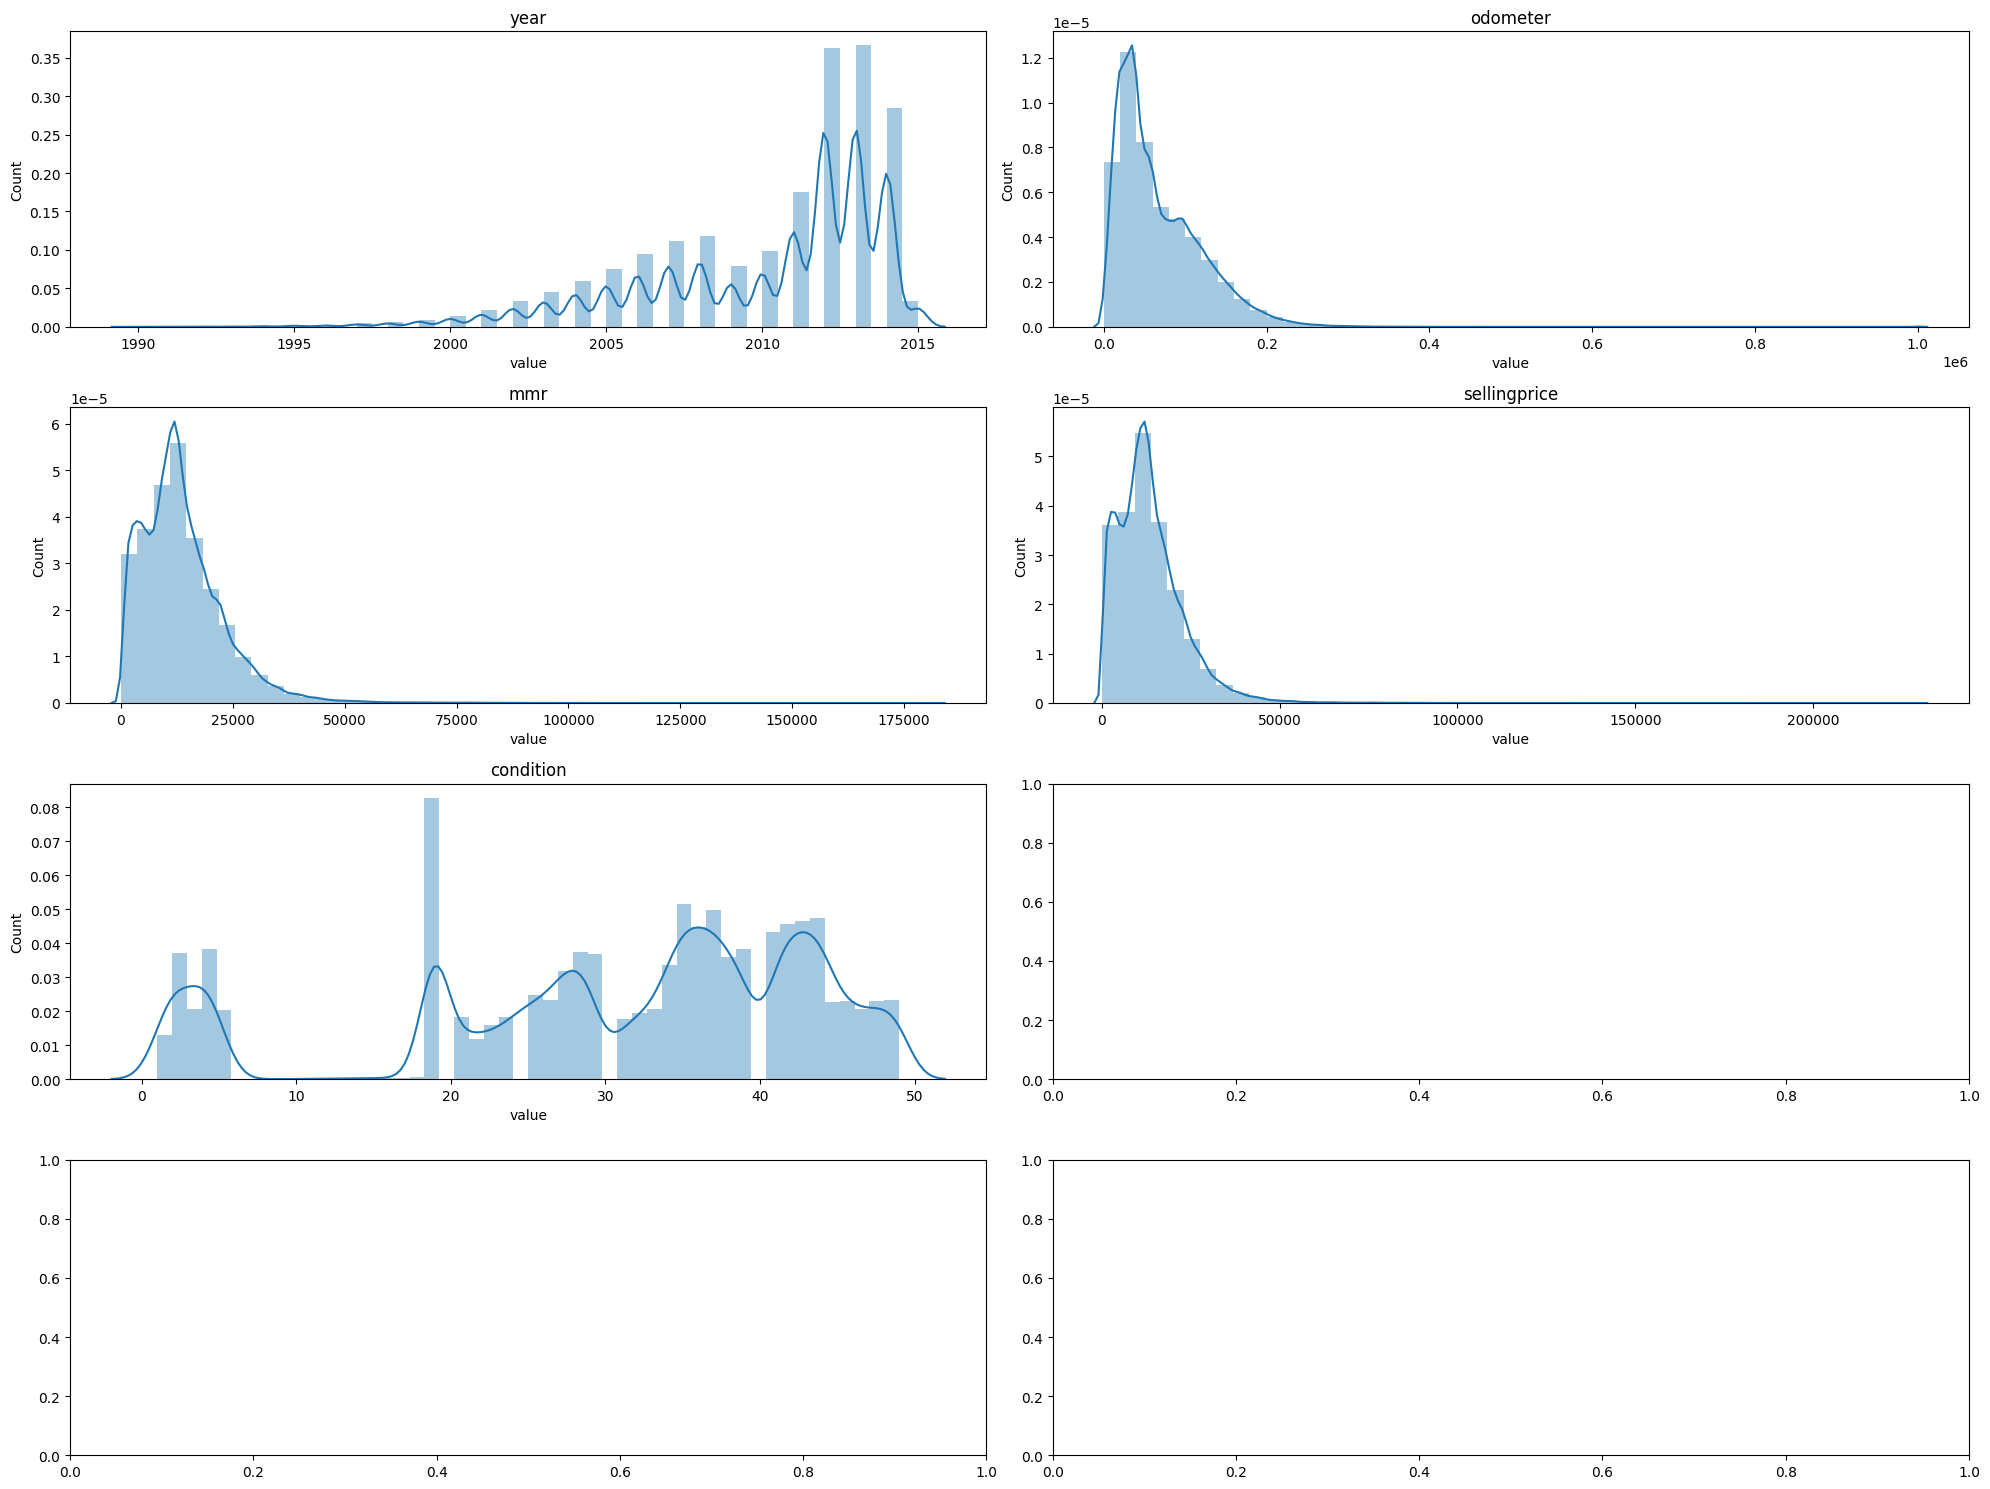

In [214]:
# distplot for the numeric features
num_features = len(numeric_col)
num_rows = 4 
num_cols = math.ceil(num_features/num_rows)

# create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,15))

#flatteb the axes if needed
if num_features > 1:
    axes = axes.flatten()
    
for i, columns in enumerate(numeric_col):
    axe = axes[i]
    sns.distplot(df5[columns],ax=axe)
    axe.set_title(f'{columns}')
    axe.set_xlabel('value')
    axe.set_ylabel('Count')
    
plt.tight_layout()
plt.show()

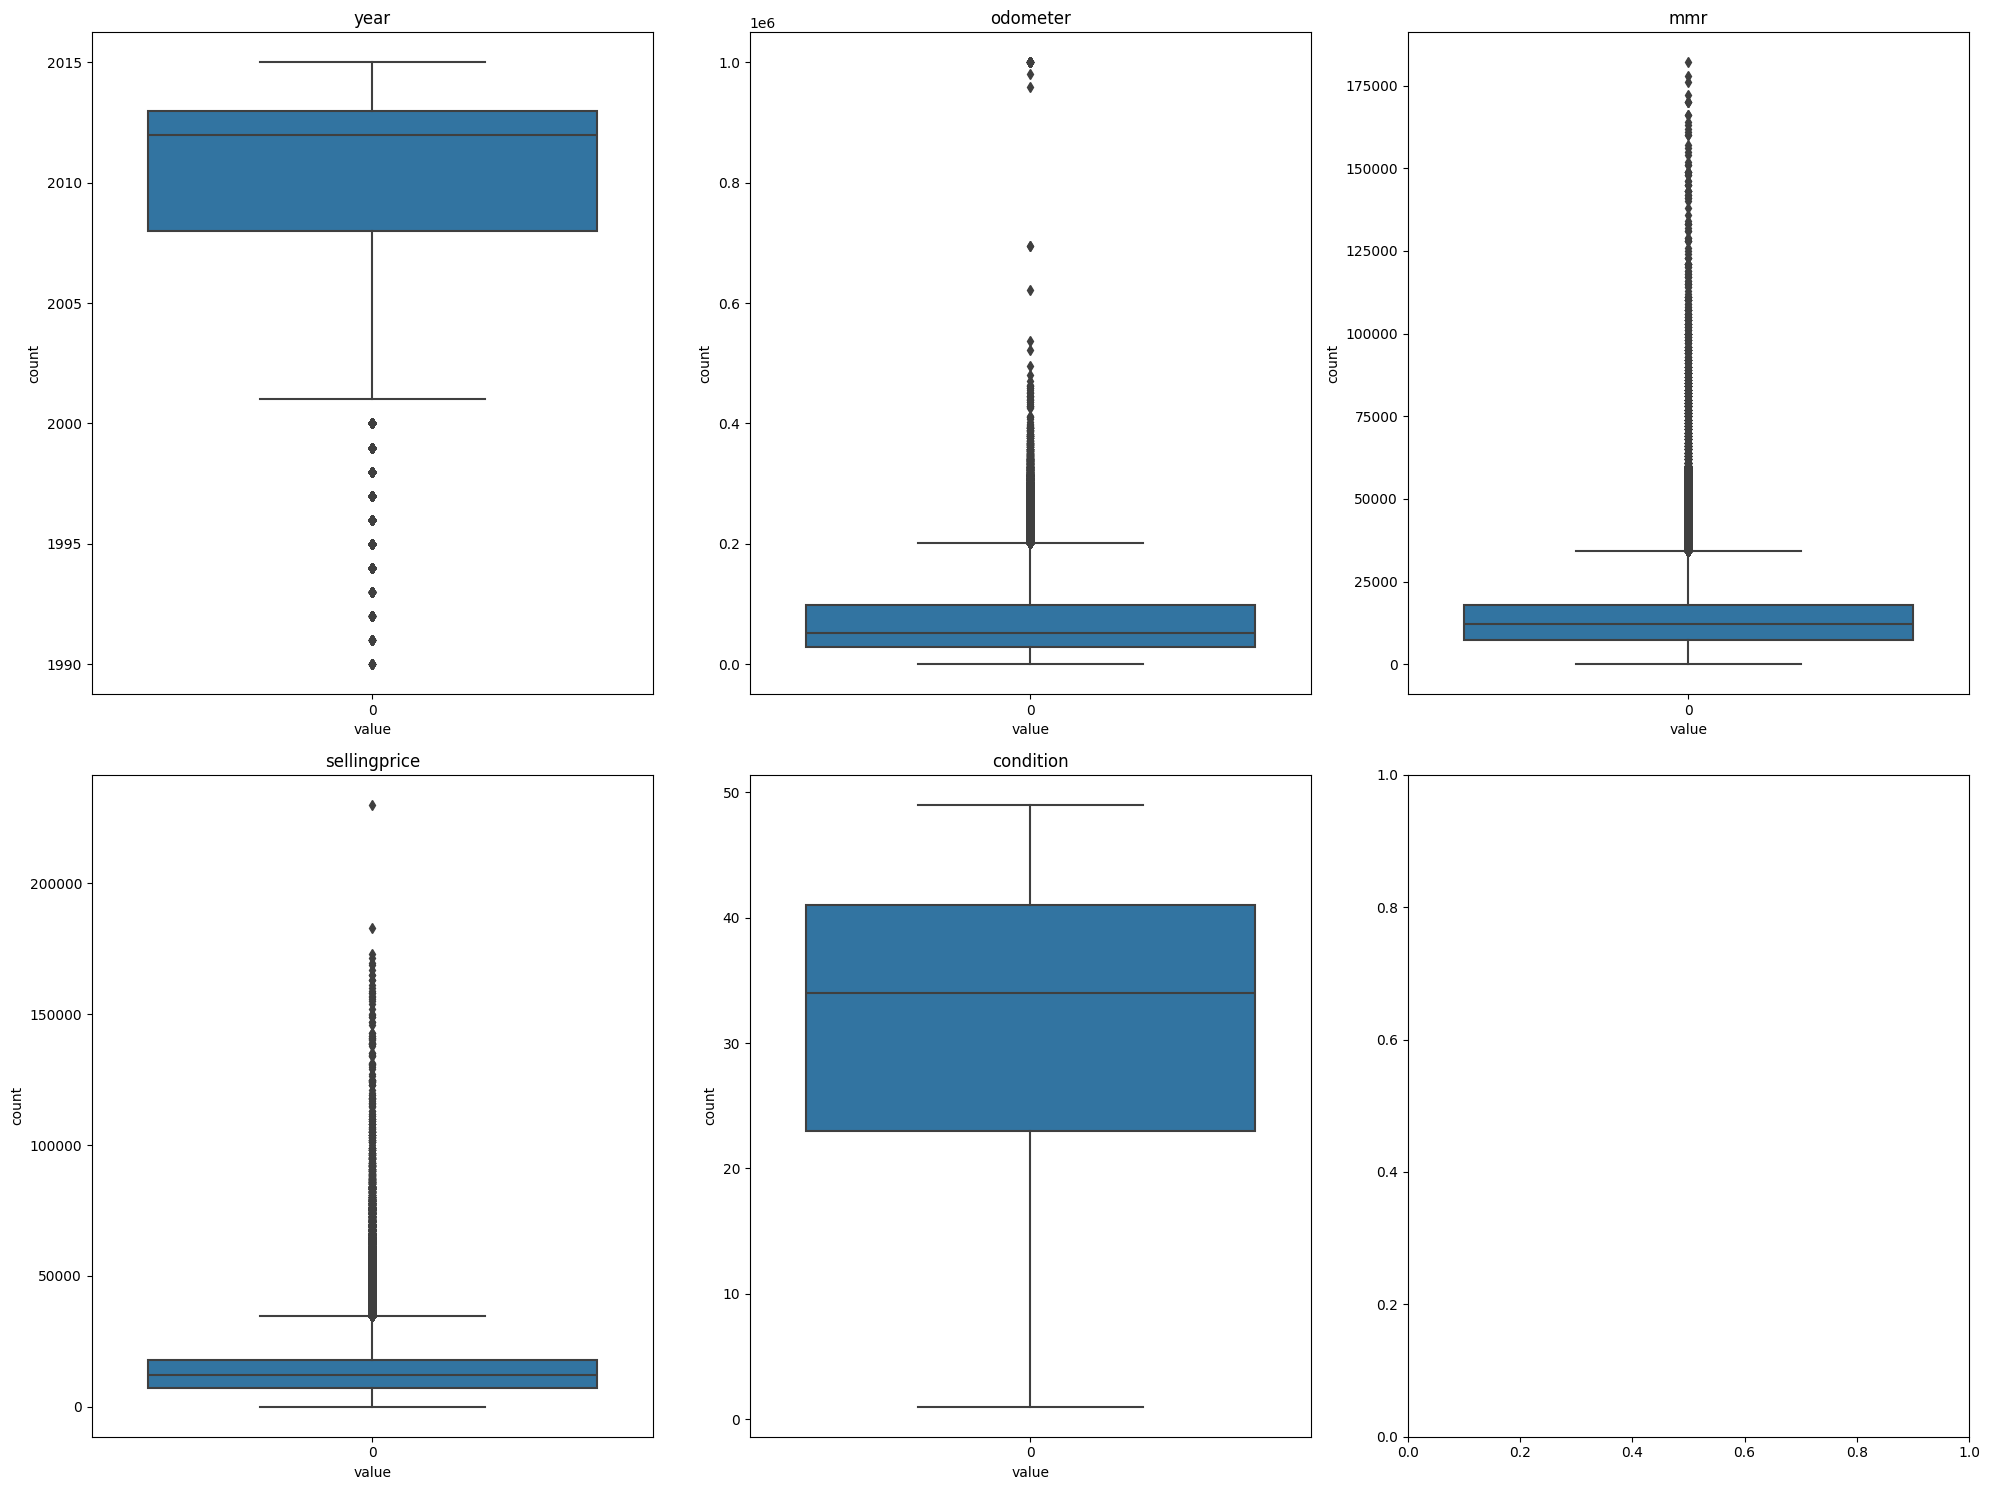

In [215]:
# Boxplot to check for outliers
num_features = len(numeric_col)
num_rows = 2 
num_cols = math.ceil(num_features/num_rows)

# create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,15))

#flatteb the axes if needed
if num_features > 1:
    axes = axes.flatten()
    
for i, columns in enumerate(numeric_col):
    axe = axes[i]
    sns.boxplot(df5[columns], ax=axe)
    axe.set_title(f'{columns}')
    axe.set_xlabel('value')
    axe.set_ylabel('count')
    
plt.tight_layout()
plt.show()


In [216]:
df5['sellingprice'].skew()

2.0304745186759288

#### from the above we can see that the dataset contains outliers and even the `sellingprice` is skewed

### Data Preprocessing

We need to encode the categorical features

Also apply log transformation to the `sellingprice` feature

In [282]:
# using mapping method to encode ordinal caegorical values
'''
def scale(x):
    if x == 'good':
        return 1
    elif x == 'better':
        return 2
    else:
        return 3
'''

"\ndef scale(x):\n    if x == 'good':\n        return 1\n    elif x == 'better':\n        return 2\n    else:\n        return 3\n"

In [283]:
#df4['grade_scale'] = df4['grade_scale'].apply(scale)

In [217]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440393 entries, 0 to 558836
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440393 non-null  int64  
 1   make          440393 non-null  object 
 2   model         440393 non-null  object 
 3   trim          440393 non-null  object 
 4   body          440393 non-null  object 
 5   transmission  440393 non-null  object 
 6   state         440393 non-null  object 
 7   condition     440393 non-null  float64
 8   odometer      440393 non-null  float64
 9   color         440393 non-null  object 
 10  interior      440393 non-null  object 
 11  mmr           440393 non-null  float64
 12  sellingprice  440393 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 63.2+ MB


In [218]:
columns = df5.columns

In [219]:
columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer', 'color', 'interior', 'mmr', 'sellingprice'],
      dtype='object')

In [220]:
df['sellingprice'].dtypes

dtype('float64')

In [223]:
num_col = [col for col in columns if df5[col].dtypes in ['int64','float64']]
cat_col = [col for col in columns if df5[col].dtypes in ['object']]

In [224]:
cat_col

['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior']

In [225]:
num_col

['year', 'condition', 'odometer', 'mmr', 'sellingprice']

In [226]:
cat_col

['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior']

In [227]:
#looping through the categorical features
for i in cat_col:
    print(i)
    print(df5[i].unique())

    print("")

make
['kia' 'bmw' 'volvo' 'nissan' 'chevrolet' 'audi' 'ford' 'cadillac' 'acura'
 'lexus' 'hyundai' 'buick' 'infiniti' 'jeep' 'mercedes-benz' 'mitsubishi'
 'mazda' 'mini' 'land-rover' 'lincoln' 'jaguar' 'volkswagen' 'toyota'
 'subaru' 'scion' 'porsche' 'dodge' 'fiat' 'chrysler' 'ferrari' 'honda'
 'gmc' 'ram' 'smart' 'bentley' 'pontiac' 'saturn' 'maserati' 'mercury'
 'hummer' 'saab' 'suzuki' 'oldsmobile' 'rolls-royce' 'isuzu' 'tesla'
 'aston-martin' 'geo' 'plymouth' 'fisker' 'daewoo' 'lamborghini' 'lotus']

model
['Sorento' '3 Series' 'S60' '6 Series Gran Coupe' 'Altima' 'M5' 'Cruze'
 'A4' 'Camaro' 'A6' 'Optima' 'Fusion' 'Q5' '6 Series' 'Impala' '5 Series'
 'A3' 'XC70' 'SQ5' 'S5' 'Suburban' 'ELR' 'V60' 'X6' 'ILX' 'K900' 'Malibu'
 'RX 350' 'Versa' 'Elantra' 'Versa Note' 'A8' 'X1' 'Enclave' 'TTS'
 '4 Series' 'MDX' 'Silverado 1500' 'SRX' 'X5' 'G Coupe' 'G Sedan' 'FX'
 'Santa Fe' 'Genesis' 'Equus' 'Sonata' 'Sonata Hybrid' 'Accent' 'Veloster'
 'Elantra Coupe' 'Azera' 'Tucson' 'Genesis Coupe' 

In [ ]:
#using get_dummies for label encoding 
'''
good = 000
better = 001
best = 010
'''

#grade_scale = pd.get_dummies(df4['grade_scale'], drop_first=True)
#df4 = pd.concat([df4, grade_scale], axis=1)
#df4 = d4.drop('grade_scale')

## Feature Engineering

In [228]:
# engineering the numerical features that have interaction
#1. odometer vs. mmr
#2. mmr vs. condition

df5['odo_mmr'] = df5['odometer'] * df5['mmr'] 
df5['mmr_cond'] = df5['mmr'] * df5['condition']
df5['odo_cond'] = df5['odometer'] * df5['condition']

#### Encoding the caegorical features

In [229]:
#using label encoder
from sklearn.preprocessing import LabelEncoder

In [230]:
cat_col

['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior']

In [232]:
df5

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,odo_mmr,mmr_cond,odo_cond
0,2015,kia,Sorento,LX,suv,automatic,ca,5.0,16639.0,white,black,20500.0,21500.0,3.410995e+08,102500.0,83195.0
1,2015,kia,Sorento,LX,suv,automatic,ca,5.0,9393.0,white,beige,20800.0,21500.0,1.953744e+08,104000.0,46965.0
2,2014,bmw,3 Series,328i SULEV,sedan,automatic,ca,45.0,1331.0,gray,black,31900.0,30000.0,4.245890e+07,1435500.0,59895.0
3,2015,volvo,S60,T5,sedan,automatic,ca,41.0,14282.0,white,black,27500.0,27750.0,3.927550e+08,1127500.0,585562.0
4,2014,bmw,6 Series Gran Coupe,650i,sedan,automatic,ca,43.0,2641.0,gray,black,66000.0,67000.0,1.743060e+08,2838000.0,113563.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,bmw,5 Series,528i,sedan,automatic,fl,39.0,66403.0,white,brown,20300.0,22800.0,1.347981e+09,791700.0,2589717.0
558833,2012,ram,2500,Power Wagon,crew-cab,automatic,wa,5.0,54393.0,white,black,30200.0,30800.0,1.642669e+09,151000.0,271965.0
558834,2012,bmw,X5,xDrive35d,suv,automatic,ca,48.0,50561.0,black,black,29800.0,34000.0,1.506718e+09,1430400.0,2426928.0
558835,2015,nissan,Altima,2.5 S,sedan,automatic,ga,38.0,16658.0,white,black,15100.0,11100.0,2.515358e+08,573800.0,633004.0


In [234]:
# List of columns to encode
columns_to_encode = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior']

df6 = df5.copy()

# Create a LabelEncoder for each column and pickle them
encoders = {}
import pickle
for column in columns_to_encode:
    encoder = LabelEncoder()
    df6[column] = encoder.fit_transform(df6[column])
    
    # Save the encoder as a pickle file
    with open(f"{column}_encoder.pkl", "wb") as file:
        pickle.dump(encoder, file)

# Display the DataFrame after encoding
print("\nEncoded DataFrame:")


Encoded DataFrame:


In [235]:
df6

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,odo_mmr,mmr_cond,odo_cond
0,2015,24,634,817,37,0,2,5.0,16639.0,17,1,20500.0,21500.0,3.410995e+08,102500.0,83195.0
1,2015,24,634,817,37,0,2,5.0,9393.0,17,0,20800.0,21500.0,1.953744e+08,104000.0,46965.0
2,2014,4,8,252,34,0,2,45.0,1331.0,7,1,31900.0,30000.0,4.245890e+07,1435500.0,59895.0
3,2015,52,572,1208,34,0,2,41.0,14282.0,17,1,27500.0,27750.0,3.927550e+08,1127500.0,585562.0
4,2014,4,33,334,34,0,2,43.0,2641.0,7,1,66000.0,67000.0,1.743060e+08,2838000.0,113563.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,4,25,315,34,0,4,39.0,66403.0,17,3,20300.0,22800.0,1.347981e+09,791700.0,2589717.0
558833,2012,41,6,925,7,0,32,5.0,54393.0,17,1,30200.0,30800.0,1.642669e+09,151000.0,271965.0
558834,2012,4,719,1485,37,0,2,48.0,50561.0,1,1,29800.0,34000.0,1.506718e+09,1430400.0,2426928.0
558835,2015,36,63,102,34,0,5,38.0,16658.0,17,1,15100.0,11100.0,2.515358e+08,573800.0,633004.0


### Now that we have encoded the categorical features, we can go ahead and build our model using the normal `sellingprice`, afterwards we might evaluate the see if we will then apply log transformation

### Building our Model

In [236]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [237]:
#separating the X and y features
X = df6.drop('sellingprice', axis=1)
y = df6['sellingprice']

In [238]:
#splitting the train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Linear Regression

In [239]:
lm = LinearRegression()
#fitting the model
lm.fit(X_train, y_train)
#predicting y
prediction = lm.predict(X_test)


In [240]:
import joblib
# Save the pipeline
joblib.dump(lm, 'vehicle_sales_model.pkl')

# Load the pipeline
model = joblib.load('vehicle_sales_model.pkl')

prediction = model.predict(X_test)

<Axes: xlabel='sellingprice'>

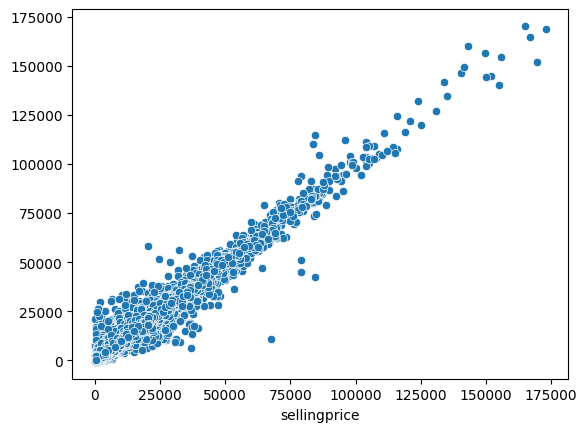

In [241]:
# evaluating our model's performance
# lets visualize this
sns.scatterplot(x = y_test, y = prediction)

In [242]:
mean_absolute_error(y_test,prediction)

1032.2975110293196

In [243]:
mean_squared_error(y_test, prediction)

2583383.02895957

In [244]:
r2_score(y_test, prediction)

0.9713639801472591

#### Decision Tree

In [ ]:
dt = DecisionTreeRegressor()
#fitting the model
dt.fit(X_train, y_train)
#predicting y
dt_prediction = dt.predict(X_test)

In [ ]:
# evaluating our model's performance
# lets visualize this
sns.scatterplot(x = y_test, y = dt_prediction)

In [ ]:
mean_absolute_error(y_test,dt_prediction)

In [ ]:
mean_squared_error(y_test, dt_prediction)

In [ ]:
round(r2_score(y_test, dt_prediction),2)

from the above we can see that Linear Regression model performed better than Decision Tree Regressor, with a mean absolute error of 1040 against 1350 of that of Decision Tree Regressor.

Also an accuracy of `97%` against `94%`

we can do a couple of things, we can cross validate the model then check for feature importance

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
# Define cross-validation strategy (e.g., 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(lm, X_scaled, y, cv=cv, scoring='r2')  # Use R^2 score
scores2 = cross_val_score(lm, X_scaled, y, cv=cv, scoring='neg_mean_absolute_error')   # Use R^2 score

In [ ]:

print("Cross-Validation Scores:", scores)
print("Cross-Validation Scores:", scores2)
print("Mean R^2 Score:", scores.mean())
print("Mean R^2 Score:", scores2.mean())
print("Standard Deviation of R^2 Scores:", scores.std())
print("Standard Deviation of R^2 Scores:", scores2.std())

### After cross-validation, the R2 score for the Linear Regression is `0.9698798326555448`

### Moving Forward, we can create a pipeline and deploy the model using streamlit